<a href="https://colab.research.google.com/github/Sani-Abdullahi-Sani/Artificial-Intelligence-Projects/blob/main/UNSW_NB15_All_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:150%"><b> Table of contents </b></h1>

 - [**Introduction**](#1)

 - [**Import and Set Up**](#2)

 - [**Pre-processing and feature selection**](#3)
    
 - [**Modelling and Evaluation**](#4)
    - [**Logistical Classification**](#4_1)
    - [**kNN**](#4_2)
    - [**Decision Tree**](#4_3)
    - [**Extra Trees**](#4_4)
    - [**Random Forest**](#4_5)
    - [**Gradient Boosting Classifier**](#4_6)
    - [**Neural Network MLP**](#4_7)
    - [**Neural Network MLP (Keras)**](#4_8)
    - [**GRU (Keras)**](#4_9)
    - [**LSTM (Keras)**](#4_10)
    
 - [**Evaluate**](#5)
   

<a id='1'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Introduction</b>

This Notebook is about transforming and modelling the data. A previous notebook of mine did the EDA using pandas-profiling and sweetviz. So its not great to load here.

The study has an all-in approach (using all descriptive features). It can be improved by adding back propagation and removing the features with high P-values. I did not have the time or motivation to do this as well.

<a id='2'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Import and Set up</b>

In [275]:
!pip install nbformat
!pip install graphviz
!pip install dtreeviz

In [276]:
# data cleaning and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

In [277]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [278]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [279]:
training = pd.read_csv('/content/drive/My Drive/UNSW_NB15_training.csv')
testing = pd.read_csv('/content/drive/My Drive/UNSW_NB15_testing.csv')
print("training ",training.shape)
print("testing ",testing.shape)

training  (175341, 45)
testing  (82332, 45)


In [280]:
training.head(n=5)

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl         sload          dload  sloss  dloss      sinpkt      dinpkt          sjit          djit  swin       stcpb       dtcpb  dwin    tcprtt    synack    ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports attack_cat  label
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   252   254  14158.942380    8495.365234      0      0   24.295600    8.375000     30.177547     11.830604   255   621772692  2202533631   255  0.000000  0.000000  0.000000     43     43            0                  0           1             0           1                 1                 1               1             0           0                 0           1           1                0     Normal      0
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372    62   252   8395.112305  503571.312500      2     17   49.915000   15.432865     61.426934   1387.778330   255  1417884146  3077387971   255  0.000000  0.000000  0.000000     52   1106            0                  0          43             1           1                 1                 1               2             0           0                 0           1           6                0     Normal      0
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161    62   252   1572.271851   60929.230470      1      6  231.875571  102.737203  17179.586860  11420.926230   255  2116150707  2963114973   255  0.111897  0.061458  0.050439     46    824            0                  0           7             1           2                 1                 1               3             0           0                 0           2           6                0     Normal      0
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108    62   252   2740.178955    3358.622070      1      3  152.876547   90.235726    259.080172   4991.784669   255  1107119177  1047442890   255  0.000000  0.000000  0.000000     52     64            0                  0           1             1           2                 1                 1               3             1           1                 0           2           1                0     Normal      0
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   254   252   8561.499023    3987.059814      2      1   47.750333   75.659602   2415.837634    115.807000   255  2436137549  1977154190   255  0.128381  0.071147  0.057234     53     45            0                  0          43             1           2                 2                 1              40             0           0                 0           2          39                0     Normal      0

In [281]:
testing.head(n=5)

id       dur proto service state  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl        sload  dload  sloss  dloss  sinpkt  dinpkt  sjit  djit  swin  stcpb  dtcpb  dwin  tcprtt  synack  ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports attack_cat  label
0   1  0.000011   udp       -   INT      2      0     496       0   90909.0902   254     0  180363632.0    0.0      0      0   0.011     0.0   0.0   0.0     0      0      0     0     0.0     0.0     0.0    248      0            0                  0           2             2           1                 1                 1               2             0           0                 0           1           2                0     Normal      0
1   2  0.000008   udp       -   INT      2      0    1762       0  125000.0003   254     0  881000000.0    0.0      0      0   0.008     0.0   0.0   0.0     0      0      0     0     0.0     0.0     0.0    881      0            0                  0           2             2           1                 1                 1               2             0           0                 0           1           2                0     Normal      0
2   3  0.000005   udp       -   INT      2      0    1068       0  200000.0051   254     0  854400000.0    0.0      0      0   0.005     0.0   0.0   0.0     0      0      0     0     0.0     0.0     0.0    534      0            0                  0           3             2           1                 1                 1               3             0           0                 0           1           3                0     Normal      0
3   4  0.000006   udp       -   INT      2      0     900       0  166666.6608   254     0  600000000.0    0.0      0      0   0.006     0.0   0.0   0.0     0      0      0     0     0.0     0.0     0.0    450      0            0                  0           3             2           2                 2                 1               3             0           0                 0           2           3                0     Normal      0
4   5  0.000010   udp       -   INT      2      0    2126       0  100000.0025   254     0  850400000.0    0.0      0      0   0.010     0.0   0.0   0.0     0      0      0     0     0.0     0.0     0.0   1063      0            0                  0           3             2           2                 2                 1               3             0           0                 0           2           3                0     Normal      0

In [282]:
all(training.columns == testing.columns)

True

In [283]:
df = pd.concat([training,testing])
df = df.reset_index(drop=True)

df.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl         sload          dload  sloss  dloss      sinpkt      dinpkt          sjit          djit  swin       stcpb       dtcpb  dwin    tcprtt    synack    ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports attack_cat  label
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   252   254  14158.942380    8495.365234      0      0   24.295600    8.375000     30.177547     11.830604   255   621772692  2202533631   255  0.000000  0.000000  0.000000     43     43            0                  0           1             0           1                 1                 1               1             0           0                 0           1           1                0     Normal      0
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372    62   252   8395.112305  503571.312500      2     17   49.915000   15.432865     61.426934   1387.778330   255  1417884146  3077387971   255  0.000000  0.000000  0.000000     52   1106            0                  0          43             1           1                 1                 1               2             0           0                 0           1           6                0     Normal      0
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161    62   252   1572.271851   60929.230470      1      6  231.875571  102.737203  17179.586860  11420.926230   255  2116150707  2963114973   255  0.111897  0.061458  0.050439     46    824            0                  0           7             1           2                 1                 1               3             0           0                 0           2           6                0     Normal      0
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108    62   252   2740.178955    3358.622070      1      3  152.876547   90.235726    259.080172   4991.784669   255  1107119177  1047442890   255  0.000000  0.000000  0.000000     52     64            0                  0           1             1           2                 1                 1               3             1           1                 0           2           1                0     Normal      0
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   254   252   8561.499023    3987.059814      2      1   47.750333   75.659602   2415.837634    115.807000   255  2436137549  1977154190   255  0.128381  0.071147  0.057234     53     45            0                  0          43             1           2                 2                 1              40             0           0                 0           2          39                0     Normal      0

In [284]:
df.describe(include='all').T

count unique     top    freq               mean                std   min          25%          50%           75%           max
id                 257673.0    NaN     NaN     NaN       72811.823858       48929.917641   1.0      32210.0      64419.0      110923.0      175341.0
dur                257673.0    NaN     NaN     NaN           1.246715           5.974305   0.0     0.000008     0.004285      0.685777     59.999989
proto                257673    133     tcp  123041                NaN                NaN   NaN          NaN          NaN           NaN           NaN
service              257673     13       -  141321                NaN                NaN   NaN          NaN          NaN           NaN           NaN
state                257673     11     FIN  117164                NaN                NaN   NaN          NaN          NaN           NaN           NaN
spkts              257673.0    NaN     NaN     NaN          19.777144         135.947152   1.0          2.0          4.0          12.0       10646.0
dpkts              257673.0    NaN     NaN     NaN          18.514703         111.985965   0.0          0.0          2.0          10.0       11018.0
sbytes             257673.0    NaN     NaN     NaN        8572.951803      173773.880605  24.0        114.0        528.0        1362.0    14355774.0
dbytes             257673.0    NaN     NaN     NaN       14387.287543      146199.281938   0.0          0.0        178.0        1064.0    14657531.0
rate               257673.0    NaN     NaN     NaN        91253.91244      160344.636693   0.0    30.789277  2955.664893   125000.0003   1000000.003
sttl               257673.0    NaN     NaN     NaN         180.000931         102.488268   0.0         62.0        254.0         254.0         255.0
dttl               257673.0    NaN     NaN     NaN          84.754957         112.762131   0.0          0.0         29.0         252.0         254.0
sload              257673.0    NaN     NaN     NaN    70608691.228217   185731252.841732   0.0  12318.00488  743942.3125    80000000.0  5988000256.0
dload              257673.0    NaN     NaN     NaN       658214.28249     2412372.138167   0.0          0.0  1747.441284   22105.38477    22422730.0
sloss              257673.0    NaN     NaN     NaN           4.889317          65.574953   0.0          0.0          0.0           3.0        5319.0
dloss              257673.0    NaN     NaN     NaN           6.743691          53.702222   0.0          0.0          0.0           2.0        5507.0
sinpkt             257673.0    NaN     NaN     NaN         912.300834        6922.153239   0.0        0.008     0.381696     58.094727     84371.496
dinpkt             257673.0    NaN     NaN     NaN          98.915462        1094.048691   0.0          0.0        0.007     56.438859      57739.24
sjit               257673.0    NaN     NaN     NaN         5419.37297       49034.496438   0.0          0.0     0.673637   2787.367296   1483830.917
djit               257673.0    NaN     NaN     NaN         582.251456        3930.153369   0.0          0.0          0.0    119.712937   463199.2401
swin               257673.0    NaN     NaN     NaN         121.753661         127.367443   0.0          0.0          0.0         255.0         255.0
stcpb              257673.0    NaN     NaN     NaN  1006120340.177803  1367794569.625119   0.0          0.0          0.0  2007375255.0  4294958913.0
dtcpb              257673.0    NaN     NaN     NaN  1002295002.140725  1363877092.420825   0.0          0.0          0.0  1992751879.0  4294881924.0
dwin               257673.0    NaN     NaN     NaN         119.254629         127.230477   0.0          0.0          0.0         255.0         255.0
tcprtt             257673.0    NaN     NaN     NaN           0.046038           0.092908   0.0          0.0          0.0      0.082082      3.821465
synack             257673.0    NaN     NaN     NaN           0.023652           0.053856   0.0          0.0          0.0      0.036842      3.226788

In [285]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [287]:
# check if there are Null values
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [288]:
df.attack_cat.unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

# Categorical Data

In [289]:
#for col in ['proto', 'service', 'state']:
#    df[col] = df[col].astype('category').cat.codes

#df['attack_cat'] = df['attack_cat'].astype('category')

In [290]:
df.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl         sload          dload  sloss  dloss      sinpkt      dinpkt          sjit          djit  swin       stcpb       dtcpb  dwin    tcprtt    synack    ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports attack_cat  label
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   252   254  14158.942380    8495.365234      0      0   24.295600    8.375000     30.177547     11.830604   255   621772692  2202533631   255  0.000000  0.000000  0.000000     43     43            0                  0           1             0           1                 1                 1               1             0           0                 0           1           1                0     Normal      0
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372    62   252   8395.112305  503571.312500      2     17   49.915000   15.432865     61.426934   1387.778330   255  1417884146  3077387971   255  0.000000  0.000000  0.000000     52   1106            0                  0          43             1           1                 1                 1               2             0           0                 0           1           6                0     Normal      0
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161    62   252   1572.271851   60929.230470      1      6  231.875571  102.737203  17179.586860  11420.926230   255  2116150707  2963114973   255  0.111897  0.061458  0.050439     46    824            0                  0           7             1           2                 1                 1               3             0           0                 0           2           6                0     Normal      0
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108    62   252   2740.178955    3358.622070      1      3  152.876547   90.235726    259.080172   4991.784669   255  1107119177  1047442890   255  0.000000  0.000000  0.000000     52     64            0                  0           1             1           2                 1                 1               3             1           1                 0           2           1                0     Normal      0
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   254   252   8561.499023    3987.059814      2      1   47.750333   75.659602   2415.837634    115.807000   255  2436137549  1977154190   255  0.128381  0.071147  0.057234     53     45            0                  0          43             1           2                 2                 1              40             0           0                 0           2          39                0     Normal      0

# Visualizing attacks categories

attack_cat
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64


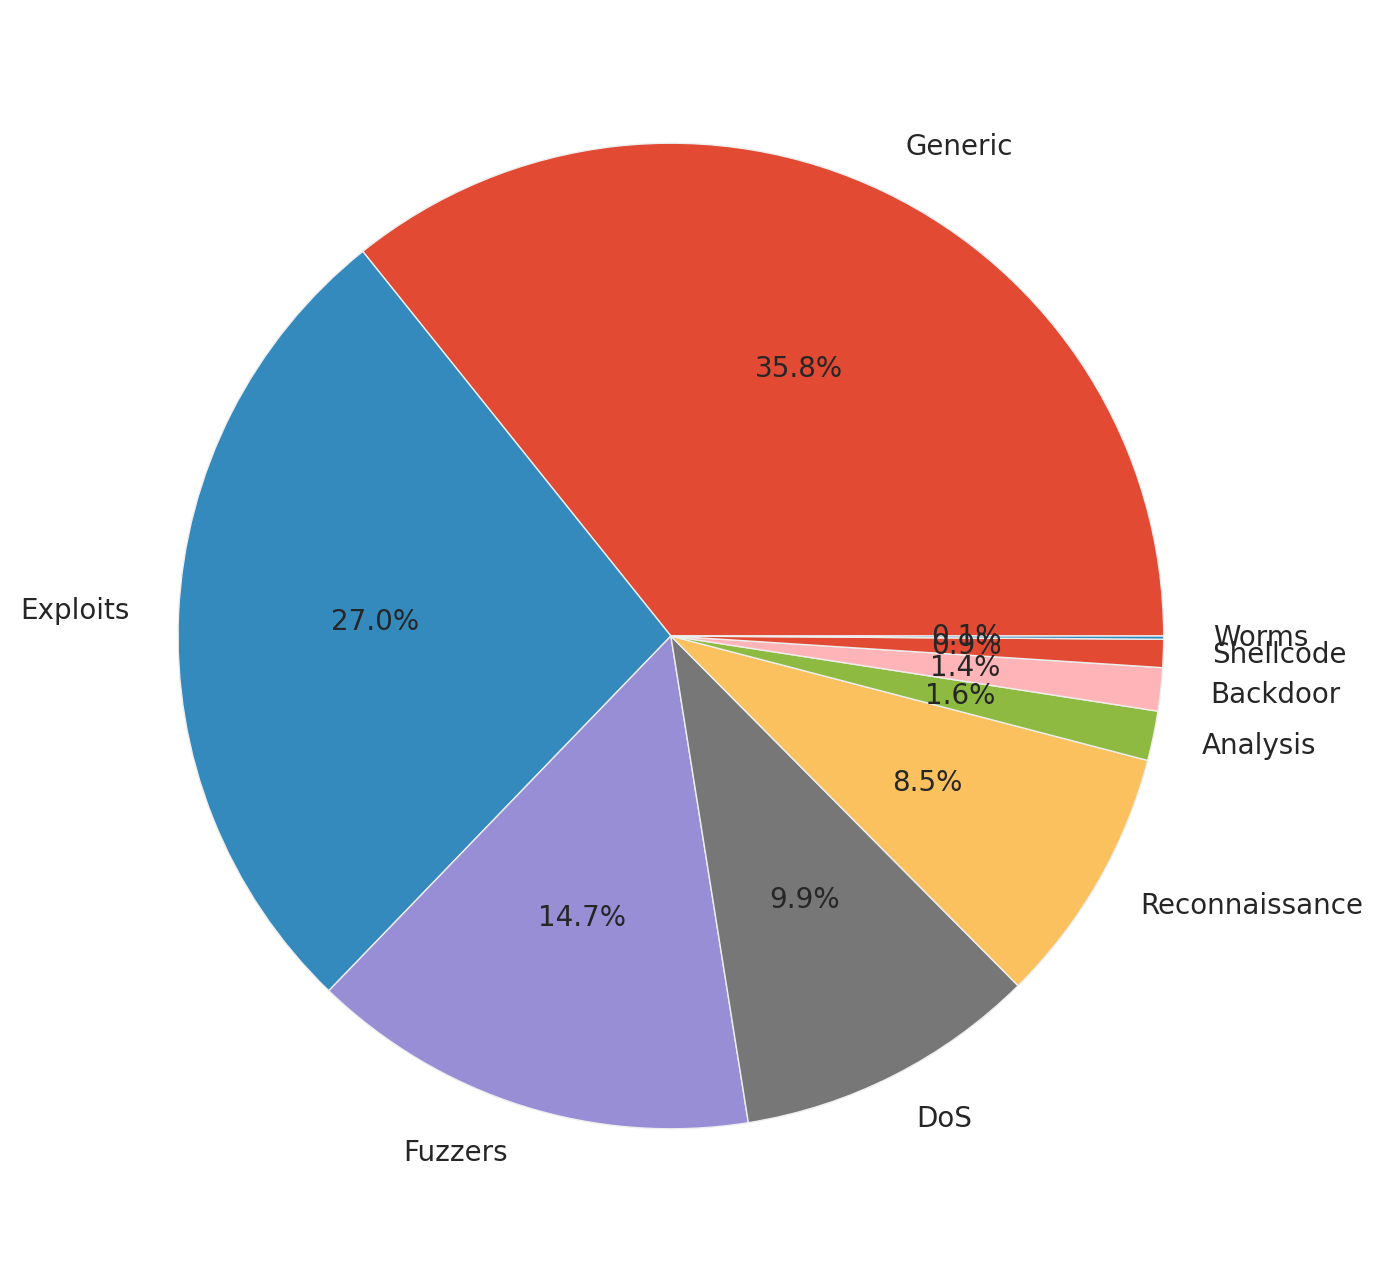

In [291]:
validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

plt.figure(figsize = (15,8))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%')
plt.show()

Generic and Exploits attacks are the most.

<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Pre-processing and Feature Selection</b>

## Drop Irrelevant or excess features

The first feature to drop is 'id'. This feature is an index and not descriptive.

The second feature to drop is 'attack_cat'. This feature is an extension of the target feature, therefore using it will give us 100% predictions but will not give us a generalizable model.

The other features to be dropped are those that were too strongly correlated. In this current version none of them were dropped, as the model is first evaluated to see how well it can perform.

In [292]:
list_drop = ['id','attack_cat']

In [293]:
df.drop(list_drop,axis=1,inplace=True)

In [294]:
df.head()

dur proto service state  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl         sload          dload  sloss  dloss      sinpkt      dinpkt          sjit          djit  swin       stcpb       dtcpb  dwin    tcprtt    synack    ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  label
0  0.121478   tcp       -   FIN      6      4     258     172  74.087490   252   254  14158.942380    8495.365234      0      0   24.295600    8.375000     30.177547     11.830604   255   621772692  2202533631   255  0.000000  0.000000  0.000000     43     43            0                  0           1             0           1                 1                 1               1             0           0                 0           1           1                0      0
1  0.649902   tcp       -   FIN     14     38     734   42014  78.473372    62   252   8395.112305  503571.312500      2     17   49.915000   15.432865     61.426934   1387.778330   255  1417884146  3077387971   255  0.000000  0.000000  0.000000     52   1106            0                  0          43             1           1                 1                 1               2             0           0                 0           1           6                0      0
2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161    62   252   1572.271851   60929.230470      1      6  231.875571  102.737203  17179.586860  11420.926230   255  2116150707  2963114973   255  0.111897  0.061458  0.050439     46    824            0                  0           7             1           2                 1                 1               3             0           0                 0           2           6                0      0
3  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108    62   252   2740.178955    3358.622070      1      3  152.876547   90.235726    259.080172   4991.784669   255  1107119177  1047442890   255  0.000000  0.000000  0.000000     52     64            0                  0           1             1           2                 1                 1               3             1           1                 0           2           1                0      0
4  0.449454   tcp       -   FIN     10      6     534     268  33.373826   254   252   8561.499023    3987.059814      2      1   47.750333   75.659602   2415.837634    115.807000   255  2436137549  1977154190   255  0.128381  0.071147  0.057234     53     45            0                  0          43             1           2                 2                 1              40             0           0                 0           2          39                0      0

## Apply Clamping

The extreme values should be pruned to reduce the skewness of some distributions. The logic applied here is that the features with a maximum value more than ten times the median value is pruned to the 95th percentile. If the 95th percentile is close to the maximum, then the tail has more interesting information than what we want to discard.

The clamping is also only applied to features with a maximum of more than 10 times the median. This prevents the bimodals and small value distributions from being excessively pruned.  

In [295]:
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

dur          spkts          dpkts        sbytes        dbytes          rate           sttl           dttl         sload         dload          sloss          dloss         sinpkt         dinpkt          sjit           djit           swin         stcpb         dtcpb           dwin         tcprtt         synack         ackdat          smean          dmean    trans_depth  response_body_len     ct_srv_src   ct_state_ttl     ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm   is_ftp_login     ct_ftp_cmd  ct_flw_http_mthd     ct_src_ltm     ct_srv_dst  is_sm_ips_ports          label
count  257673.000000  257673.000000  257673.000000  2.576730e+05  2.576730e+05  2.576730e+05  257673.000000  257673.000000  2.576730e+05  2.576730e+05  257673.000000  257673.000000  257673.000000  257673.000000  2.576730e+05  257673.000000  257673.000000  2.576730e+05  2.576730e+05  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000       2.576730e+05  257673.000000  257673.000000  257673.000000     257673.000000     257673.000000   257673.000000  257673.000000  257673.000000     257673.000000  257673.000000  257673.000000    257673.000000  257673.000000
mean        1.246715      19.777144      18.514703  8.572952e+03  1.438729e+04  9.125391e+04     180.000931      84.754957  7.060869e+07  6.582143e+05       4.889317       6.743691     912.300834      98.915462  5.419373e+03     582.251456     121.753661  1.006120e+09  1.002295e+09     119.254629       0.046038       0.023652       0.022386     137.639027     121.649703       0.102242       1.968900e+03       9.383176       1.324978       6.050467          5.238271          4.032677        8.322964       0.012819       0.012850          0.132005       6.800045       9.121049         0.014274       0.639077
std         5.974305     135.947152     111.985965  1.737739e+05  1.461993e+05  1.603446e+05     102.488268     112.762131  1.857313e+08  2.412372e+06      65.574953      53.702222    6922.153239    1094.048691  4.903450e+04    3930.153369     127.367443  1.367795e+09  1.363877e+09     127.230477       0.092908       0.053856       0.045771     205.901118     254.041013       0.710593       4.962523e+04      10.829706       0.992300       8.173749          8.160822          5.831515       11.120754       0.116091       0.116421          0.681854       8.396266      10.874752         0.118618       0.480269
min         0.000000       1.000000       0.000000  2.400000e+01  0.000000e+00  0.000000e+00       0.000000       0.000000  0.000000e+00  0.000000e+00       0.000000       0.000000       0.000000       0.000000  0.000000e+00       0.000000       0.000000  0.000000e+00  0.000000e+00       0.000000       0.000000       0.000000       0.000000      24.000000       0.000000       0.000000       0.000000e+00       1.000000       0.000000       1.000000          1.000000          1.000000        1.000000       0.000000       0.000000          0.000000       1.000000       1.000000         0.000000       0.000000
25%         0.000008       2.000000       0.000000  1.140000e+02  0.000000e+00  3.078928e+01      62.000000       0.000000  1.231800e+04  0.000000e+00       0.000000       0.000000       0.008000       0.000000  0.000000e+00       0.000000       0.000000  0.000000e+00  0.000000e+00       0.000000       0.000000       0.000000       0.000000      57.000000       0.000000       0.000000       0.000000e+00       2.000000       1.000000       1.000000          1.000000          1.000000        1.000000       0.000000       0.000000          0.000000       2.000000       2.000000         0.000000       0.000000
50%         0.004285       4.000000       2.000000  5.280000e+02  1.780000e+02  2.955665e+03     254.000000      29.000000  7.439423e+05  1.747441e+03       0.000000       0.000000       0.381696       0.007000  6.736370e-01       0.000000       0.000000  0.000000e+00  0.000000e+00       0.000000       0.000000       0.000000      

In [296]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [297]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

dur          spkts          dpkts         sbytes         dbytes           rate           sttl           dttl         sload         dload          sloss          dloss         sinpkt         dinpkt           sjit           djit           swin         stcpb         dtcpb           dwin         tcprtt         synack         ackdat          smean          dmean    trans_depth  response_body_len     ct_srv_src   ct_state_ttl     ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm   is_ftp_login     ct_ftp_cmd  ct_flw_http_mthd     ct_src_ltm     ct_srv_dst  is_sm_ips_ports          label
count  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000  2.576730e+05  2.576730e+05  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000  2.576730e+05  2.576730e+05  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000      257673.000000  257673.000000  257673.000000  257673.000000     257673.000000     257673.000000   257673.000000  257673.000000  257673.000000     257673.000000  257673.000000  257673.000000    257673.000000  257673.000000
mean        0.456516      12.327372       9.855747    1668.298689    3219.398486   77959.930882     180.000931      84.754957  5.110515e+07  3.477517e+05       2.180974       2.956693      37.158635      30.909571    1759.611714     234.711374     121.753661  9.945511e+08  9.906237e+08     119.254629       0.046038       0.023652       0.022386     123.076155     109.314292       0.098660           9.679225       9.114517       1.324978       5.658528          4.861627          3.879448        8.051511       0.012819       0.012850          0.098652       6.382822       8.857366         0.014274       0.639077
std         0.759088      16.861516      16.471114    3197.276145    8361.316057  106754.703097     102.488268     112.762131  7.666502e+07  9.740522e+05       3.265256       6.008834      61.852646      50.163202    2852.886830     651.083756     127.367443  1.342271e+09  1.338062e+09     127.230477       0.092908       0.053856       0.045771     145.047115     207.972476       0.298205          37.080850      10.058965       0.992300       6.866560          6.864614          5.367192       10.333915       0.116091       0.116421          0.298195       7.084512      10.116552         0.118618       0.480269
min         0.000000       1.000000       0.000000      24.000000       0.000000       0.000000       0.000000       0.000000  0.000000e+00  0.000000e+00       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000  0.000000e+00  0.000000e+00       0.000000       0.000000       0.000000       0.000000      24.000000       0.000000       0.000000           0.000000       1.000000       0.000000       1.000000          1.000000          1.000000        1.000000       0.000000       0.000000          0.000000       1.000000       1.000000         0.000000       0.000000
25%         0.000008       2.000000       0.000000     114.000000       0.000000      30.789277      62.000000       0.000000  1.231800e+04  0.000000e+00       0.000000       0.000000       0.008000       0.000000       0.000000       0.000000       0.000000  0.000000e+00  0.000000e+00       0.000000       0.000000       0.000000       0.000000      57.000000       0.000000       0.000000           0.000000       2.000000       1.000000       1.000000          1.000000          1.000000        1.000000       0.000000       0.000000          0.000000       2.000000       2.000000         0.000000       0.000000
50%         0.004285       4.000000       2.000000     528.000000     178.000000    2955.664893     254.000000      29.000000  7.439423e+05  1.747441e+03       0.000000       0.000000       0.381696       0.007000       0.673637       0.000000       0.000000  0.000000e+00  0.000000e+00       0.000000       0

## Apply log function to nearly all numeric, since they are all mostly skewed to the right

It would have been too much of a slog to apply the log function individually, therefore a simple rule has been set up: if the number of unique values in the continuous feature is more than 50 then apply the log function. The reason more than 50 unique values are sought is to filter out the integer based features that act more categorically.  

In [298]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

## Reduce the labels in categorical features

Some features have very high cardinalities, and this section reduces the cardinality to 5 or 6 per feature. The logic is to take the top 5 occuring labels in the feature as the labels and set the remainder to '-' (seldom used) labels. When the encoding is done later on, the dimensionality will not explode and cause the curse of dimensionality.

In [299]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

proto service   state
count   257673  257673  257673
unique     133      13      11
top        tcp       -     FIN
freq    123041  141321  117164

In [300]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')

    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [301]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

proto service   state
count   257673  257673  257673
unique       6       5       6
top        tcp       -     FIN
freq    123041  149701  117164

In [302]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object', name='proto')

In [303]:
df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object', name='proto')

## View before and after of features

This section simply displays the distributions within features before and after the transformations.  

## Best Features

This section does an analysis (univariate statistical tests) to determine which features best predict the target feature.

In [304]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2
import plotly.graph_objs as go
import plotly.io as pio

# Ensure Plotly renders correctly in Jupyter Notebook
pio.renderers.default = 'colab'

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,4:-2]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()

## Encode categorical features

The categorical features must be encoded to ensure that the models can interpret them. One-hot encoding is used since none of the categorical features are ordinal.  

In [305]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [306]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(257673, 42)

In [307]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [308]:
np.shape(X)

(257673, 56)

In [309]:
df_cat.describe(include='all')

proto service   state
count   257673  257673  257673
unique       6       5       6
top        tcp       -     FIN
freq    123041  149701  117164

In [310]:
X[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14647458e-01, 1.79175947e+00, 1.60943791e+00,
       5.55295958e+00, 5.15329159e+00, 4.31865397e+00, 2.52000000e+02,
       2.54000000e+02, 9.55817230e+00, 9.04739373e+00, 0.00000000e+00,
       0.00000000e+00, 3.23063047e+00, 2.23804657e+00, 3.43969819e+00,
       2.55183325e+00, 2.55000000e+02, 2.02480851e+01, 2.15128742e+01,
       2.55000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.76120012e+00, 3.78418963e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00])

In [311]:
len(feature_names)

42

In [312]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [313]:
len(feature_names)

56

<a id='4'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Modelling and Evaluation</b>

## Prep for Modelling

### Split test and training
In this section the data is split into test and training sets using stratified sampling.

In [314]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y)

### Standardize continuous features
a standard scaler is used on the continuous features to put them all in the same order of size.

In [319]:
df_cat.describe(include='all')

proto service   state
count   257673  257673  257673
unique       6       5       6
top        tcp       -     FIN
freq    123041  149701  117164

In [320]:
# 6 + 5 + 6 unique = 17, therefore the first 17 rows will be the categories that have been encoded, start scaling from row 18 only.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

### Import Metrics

Imports the libraries that will be used to evaluate the models later on

<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Decision Tree</b>


# Conducting a grid search to optimize the model toward maximizing recall. Recall rate should be high to create the first layer of protection.

In [422]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
import dtreeviz

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

model = DecisionTreeClassifier()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0


In [424]:
clf=grid_search.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  1.0


# Visualising the Rules

In [426]:
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

['DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'cmex10', 'DejaVu Serif Display', 'STIXGeneral', 'STIXSizeFiveSym', 'DejaVu Serif', 'STIXNonUnicode', 'STIXGeneral', 'STIXSizeTwoSym', 'cmsy10', 'cmr10', 'STIXNonUnicode', 'cmtt10', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'STIXNonUnicode', 'DejaVu Serif', 'DejaVu Serif', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'STIXGeneral', 'STIXNonUnicode', 'cmmi10', 'STIXSizeOneSym', 'DejaVu Sans', 'cmb10', 'DejaVu Sans Display', 'DejaVu Sans', 'STIXSizeOneSym', 'cmss10', 'Liberation Serif', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans', 'Liberation Serif', 'Liberation Serif', 'Liberation Mono', 'Liberation Sans', 'Liberation Mono', 'Liberation Sans Narrow', 'Humor Sans', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Sans Narrow']


:::::::> The RULES FOR HIGH RECALL RATE <::::::: 
 |--- sttl <= -1.16
|   |--- tcp <= 0.50
|   |   |--- class: 0
|   |--- tcp >  0.50
|   |   |--- class: 1
|--- sttl >  -1.16
|   |--- synack <= 0.37
|   |   |--- class: 1
|   |--- synack >  0.37
|   |   |--- class: 1



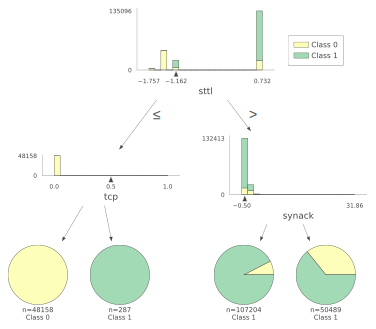

In [429]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '10'
print(":::::::> The RULES FOR HIGH RECALL RATE <::::::: \n" ,export_text(clf,feature_names=feature_names))

viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train,
                           feature_names=feature_names)
viz_model.view()

From the decision tree, we visualized the rule of tree as sttl<=-1.162 and sttl>1.162

In [430]:
%%time
start = time.time()
model = DecisionTreeClassifier(criterion="entropy", max_depth=18).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 6.04 s, sys: 23 ms, total: 6.07 s
Wall time: 6.18 s


In [362]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 94.15%
Recall: 94.15%
Precision: 94.26%
F1-Score: 94.18%
time to train: 13.66 s
time to predict: 0.01 s
total: 13.67 s


In [351]:
#plt.rcParams['figure.figsize']=5,5
#sns.set_style("white")
#plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
#plt.show()

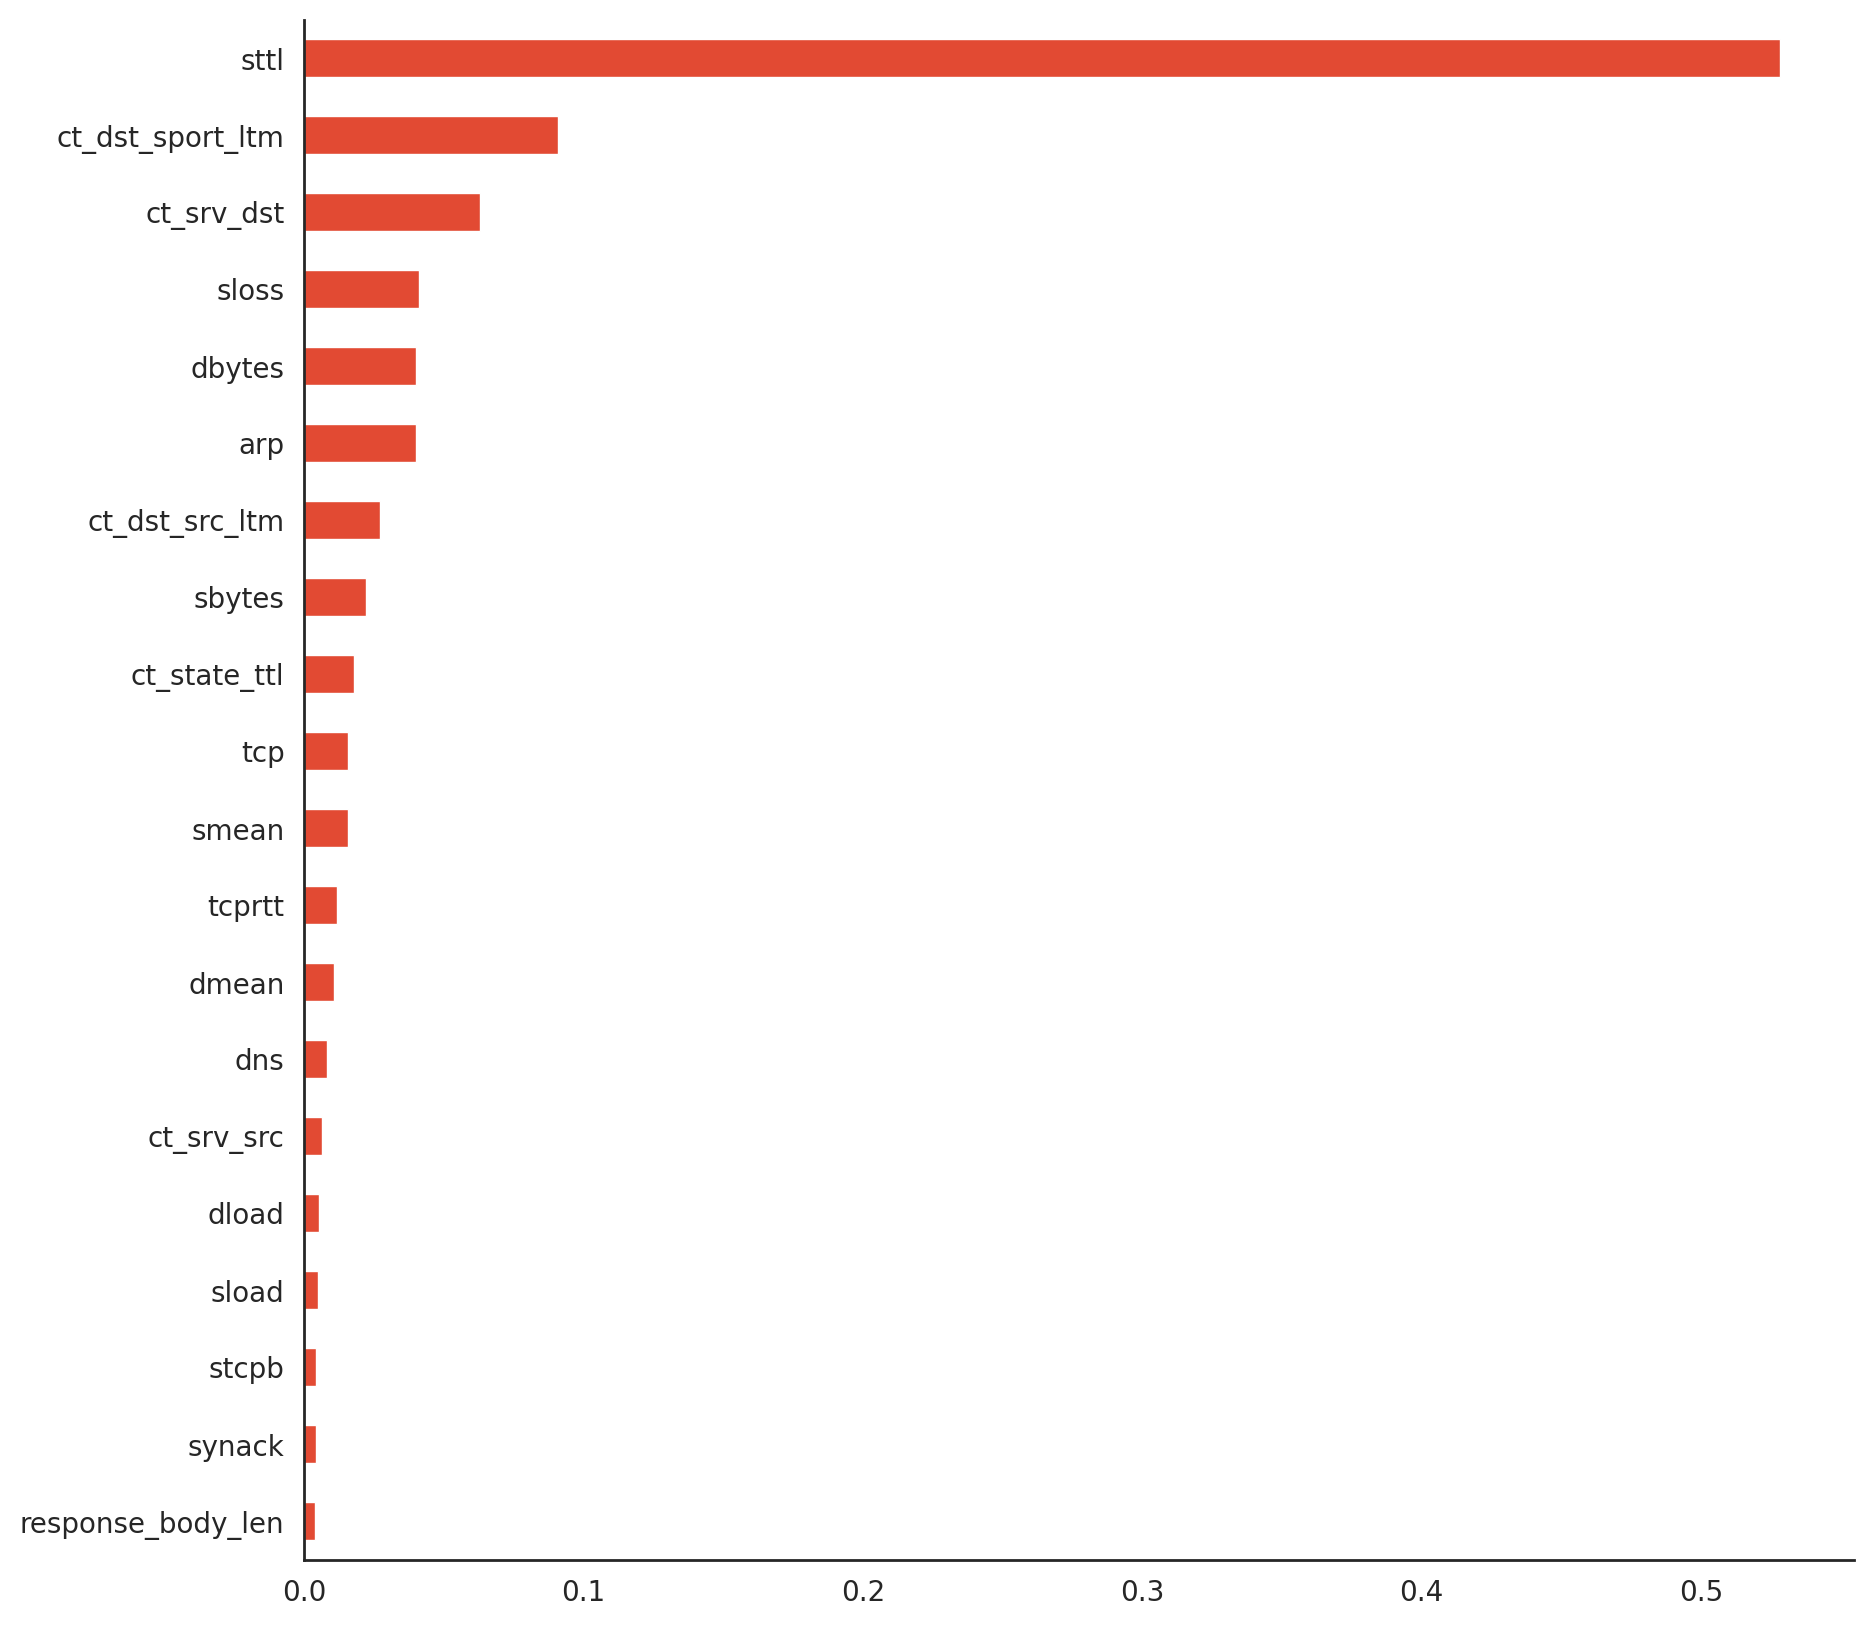

In [431]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [364]:
feature_names

['tcp',
 'udp',
 '-',
 'unas',
 'arp',
 '-',
 'dns',
 'http',
 'smtp',
 'FIN',
 'INT',
 'CON',
 'REQ',
 'RST',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

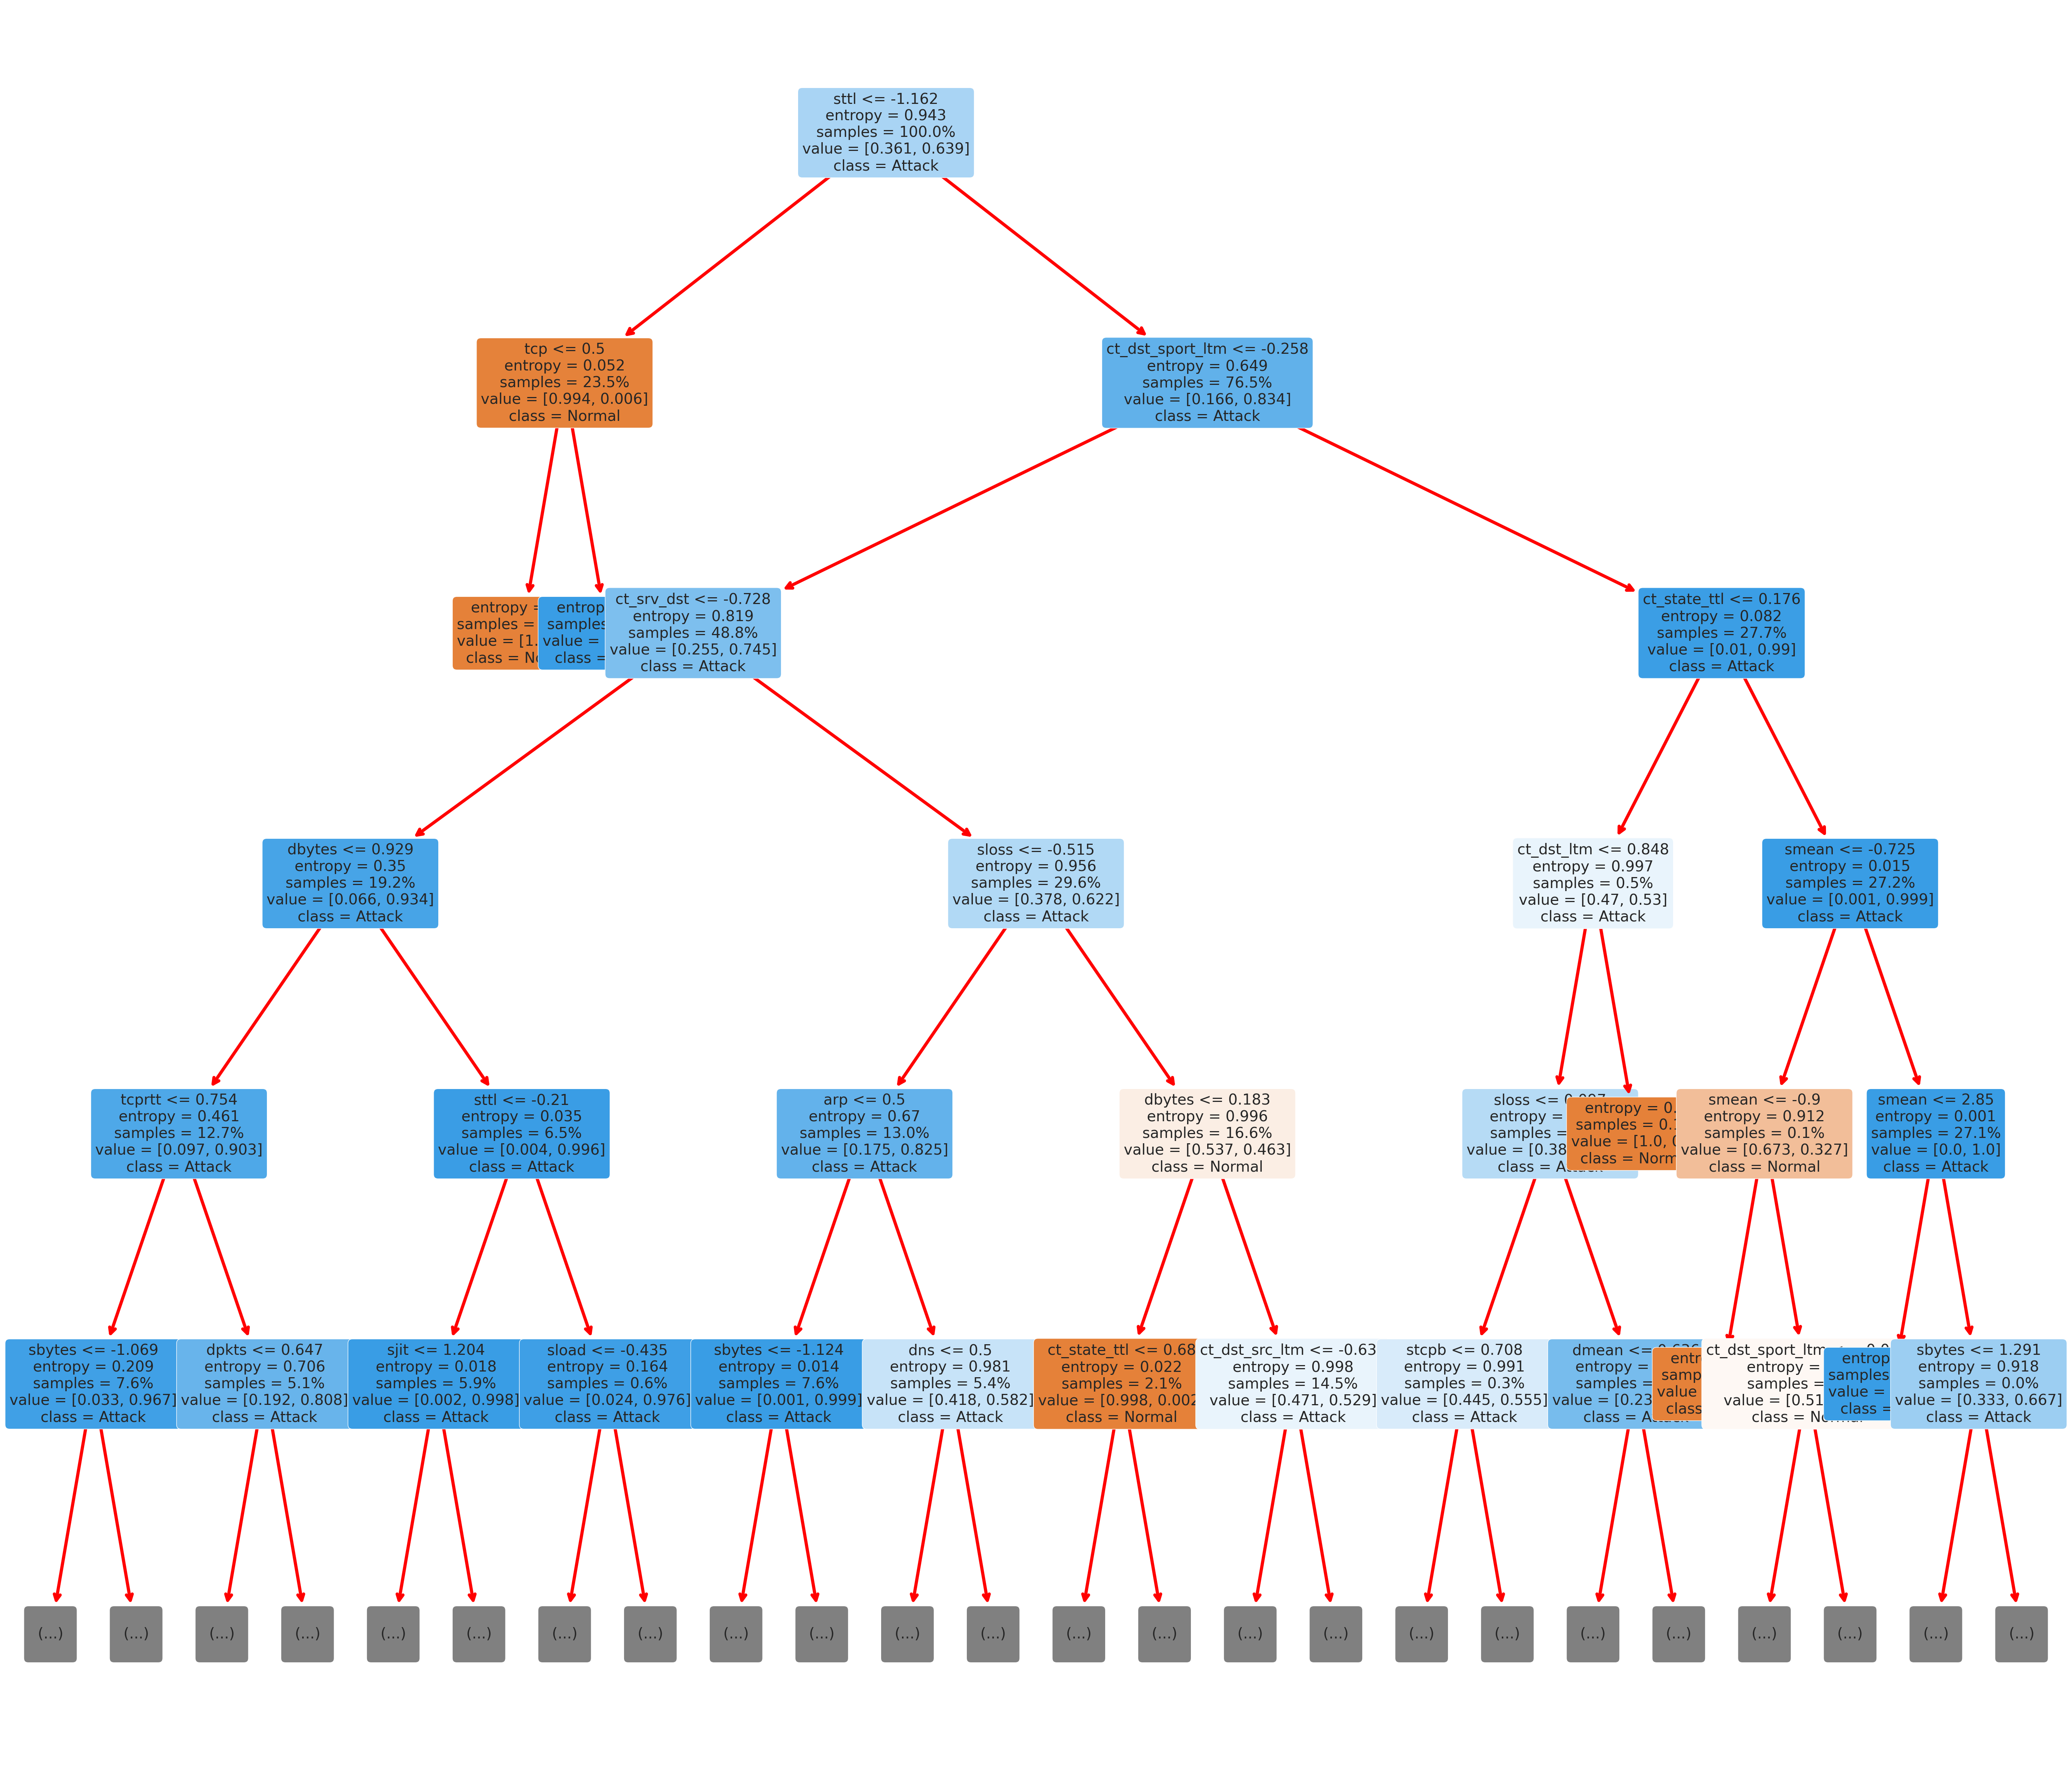

In [365]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the decision tree with a maximum depth of 5
fig = plt.figure(figsize=(35, 30))
DTtree = tree.plot_tree(model, feature_names=feature_names, class_names=['Normal', 'Attack'], fontsize=14, proportion=True, filled=True, rounded=True, max_depth=5)

# Customize the arrows
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

# Save the figure
fig.savefig('Decision Tree Classifier XAI Visualization Part 2.png')


In [376]:
!pip install eli5

In [ ]:
#import eli5 #for purmutation importance
#from eli5.sklearn import PermutationImportance
#perm = PermutationImportance(model, random_state=1).fit(X_test,y_test)
#eli5.show_weights(perm, feature_names = feature_names)

# Global explanation: Permutation & Feature Importance

In [378]:
from sklearn.inspection import permutation_importance

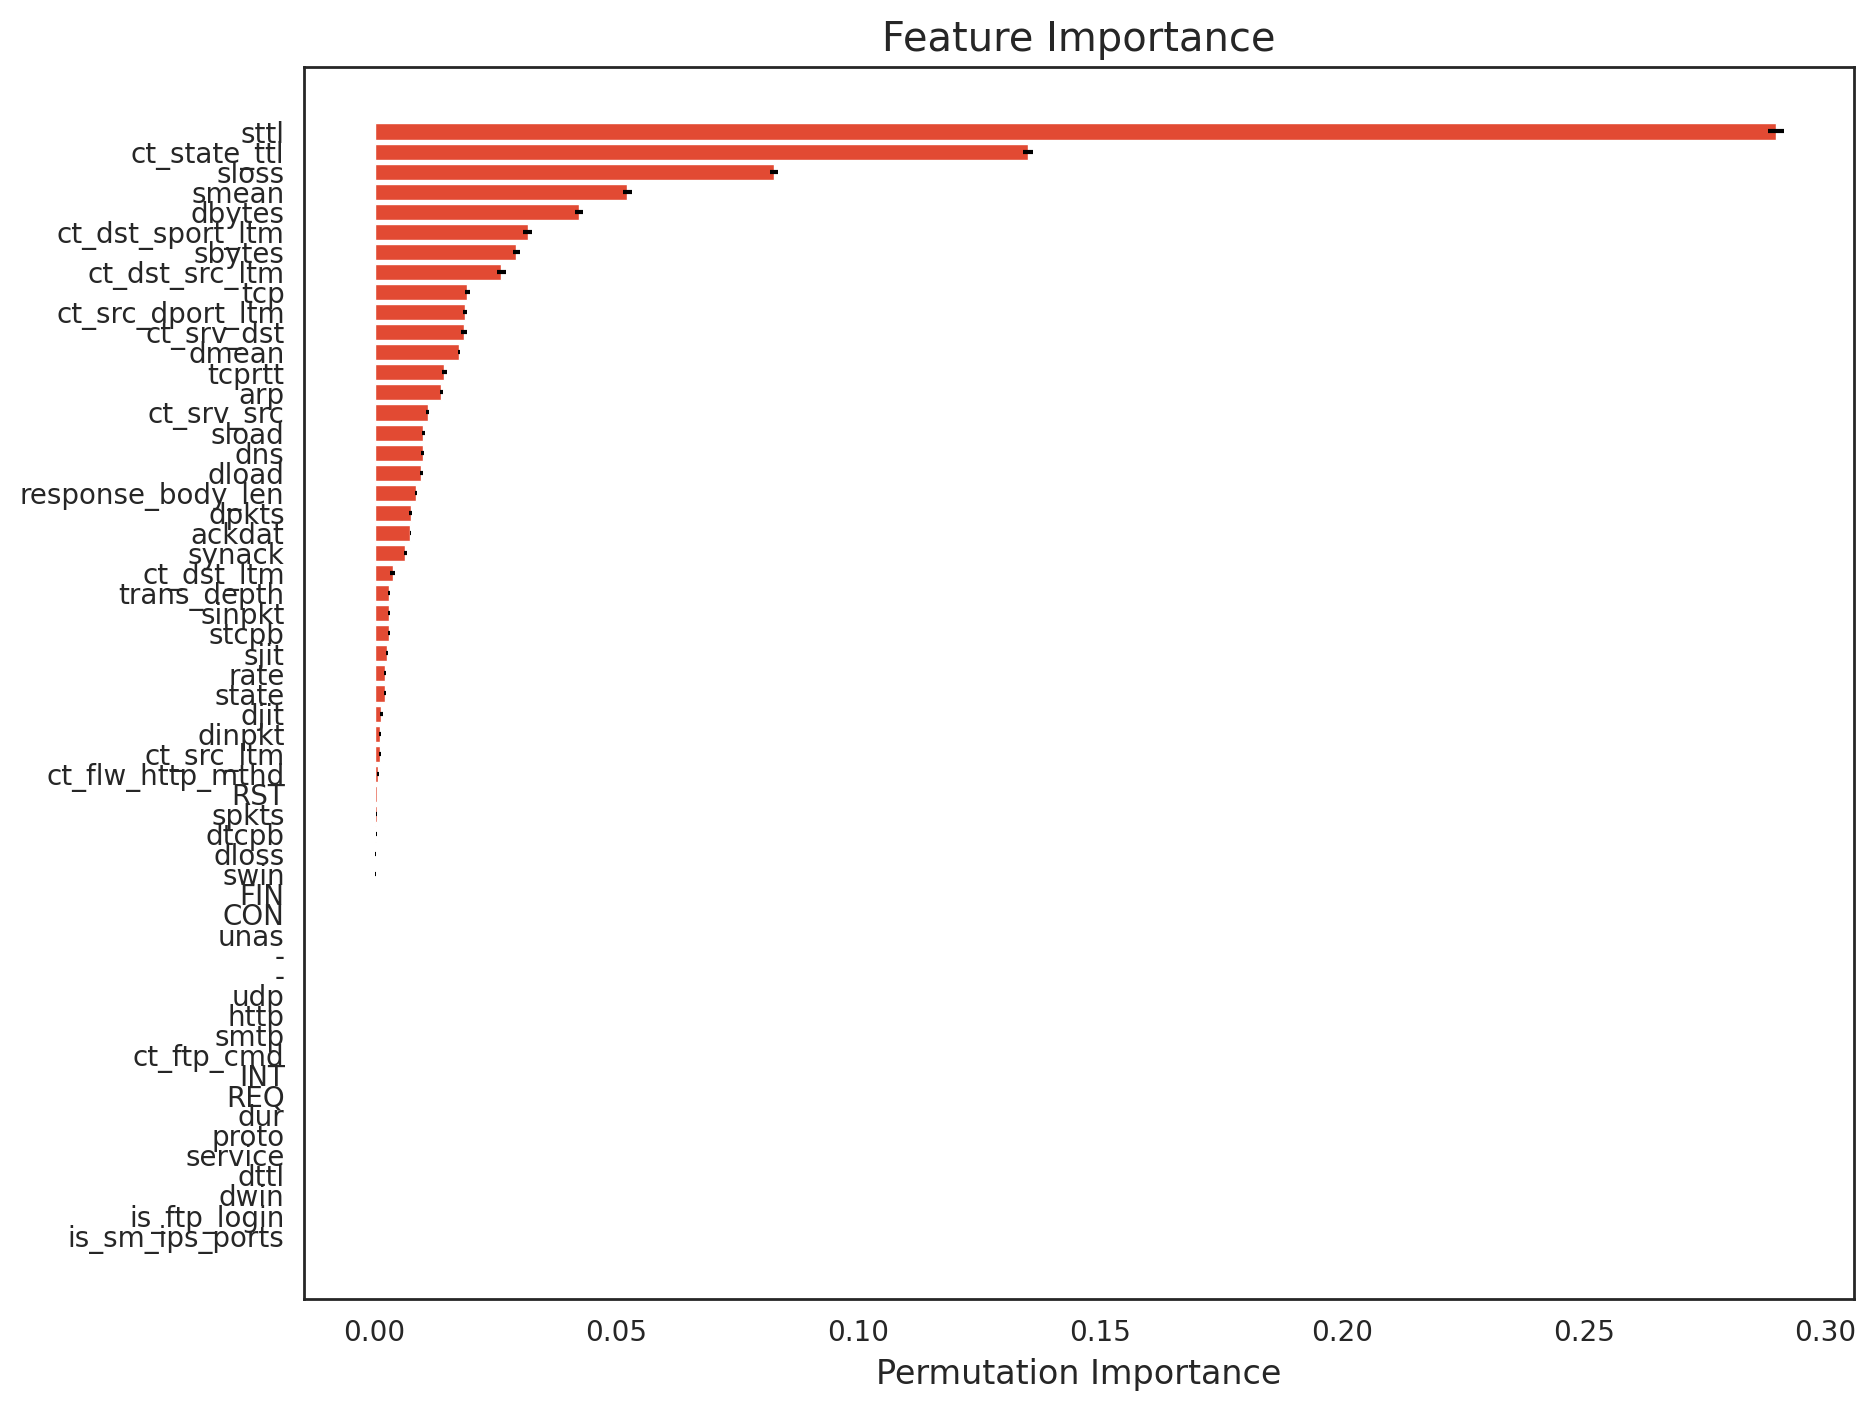

In [380]:
# Set n_jobs to 1 to disable parallel processing
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1, n_jobs=1)

# Extract feature importance and standard deviation
importance = result.importances_mean
std = result.importances_std

# Sort features by importance
indices = np.argsort(importance)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importance[indices], xerr=std[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()

<a id='4_5'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [381]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4032686efa3427d6053ed06891cf098a3ea3497cbb351eba813e73534db8c2e8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [432]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [433]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 40,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 32.1 s, sys: 95.4 ms, total: 32.2 s
Wall time: 29.1 s


In [434]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 95.05%
Recall: 95.05%
Precision: 95.06%
F1-Score: 95.05%
time to train: 28.43 s
time to predict: 0.66 s
total: 29.08 s


# Visualizing the rules present in the tree

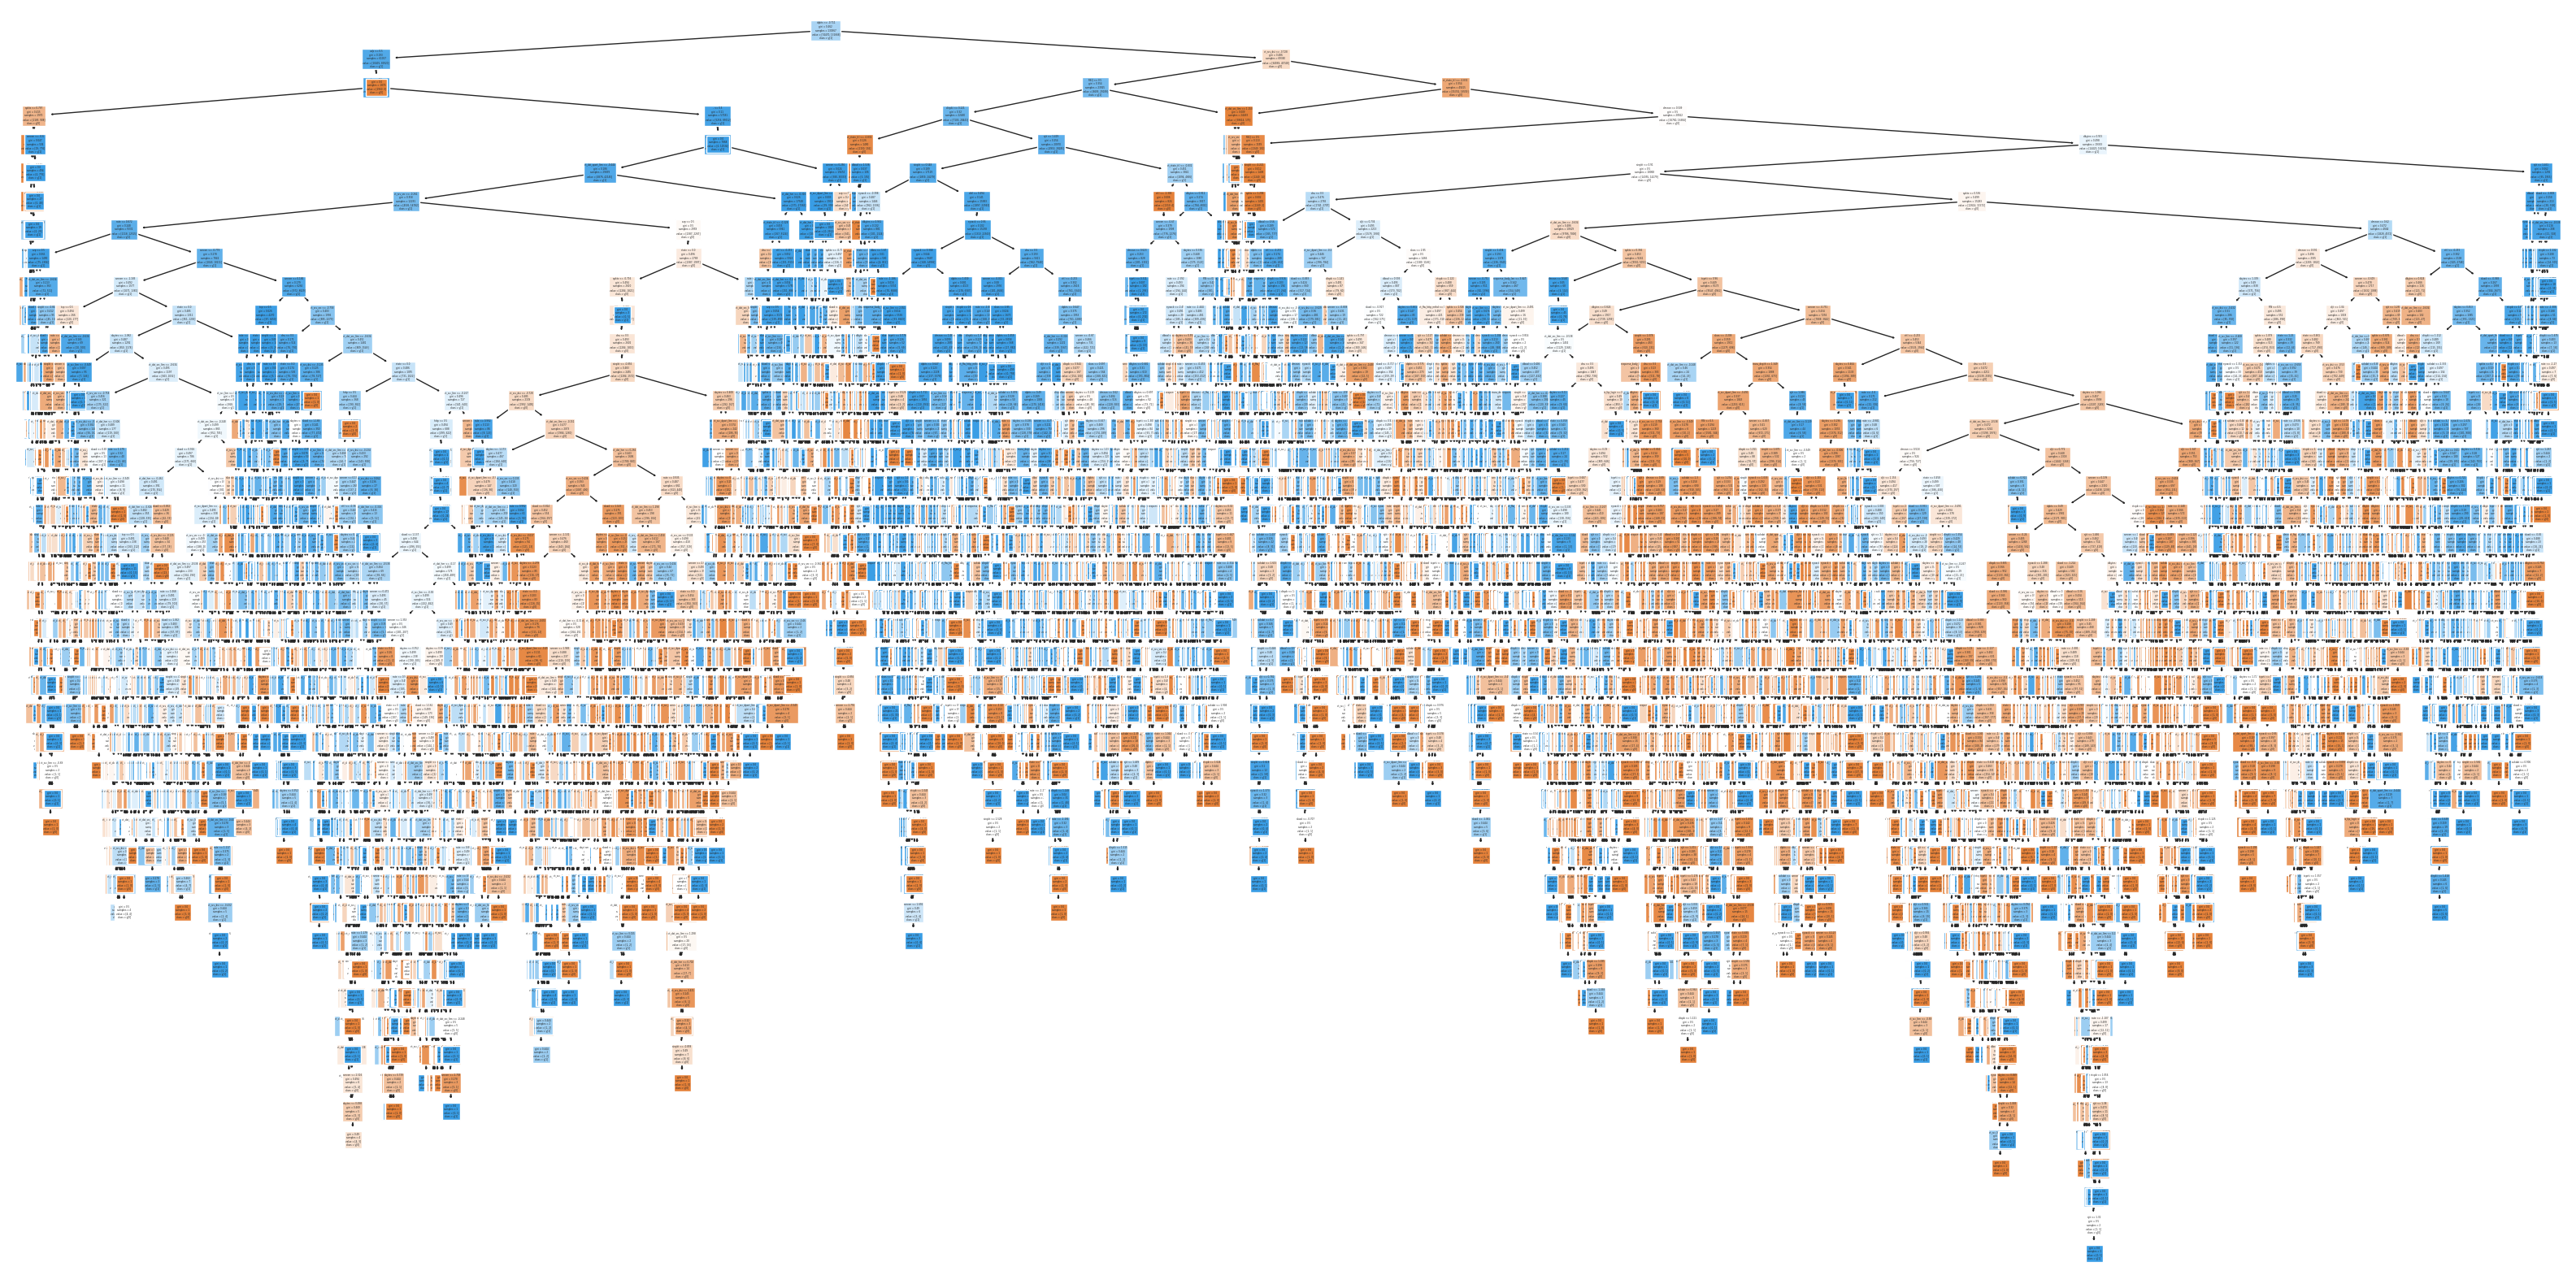

In [439]:
!pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Access an estimator within the valid index range (0 to 39)
plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], feature_names=feature_names, filled=True, class_names=True)
plt.show()

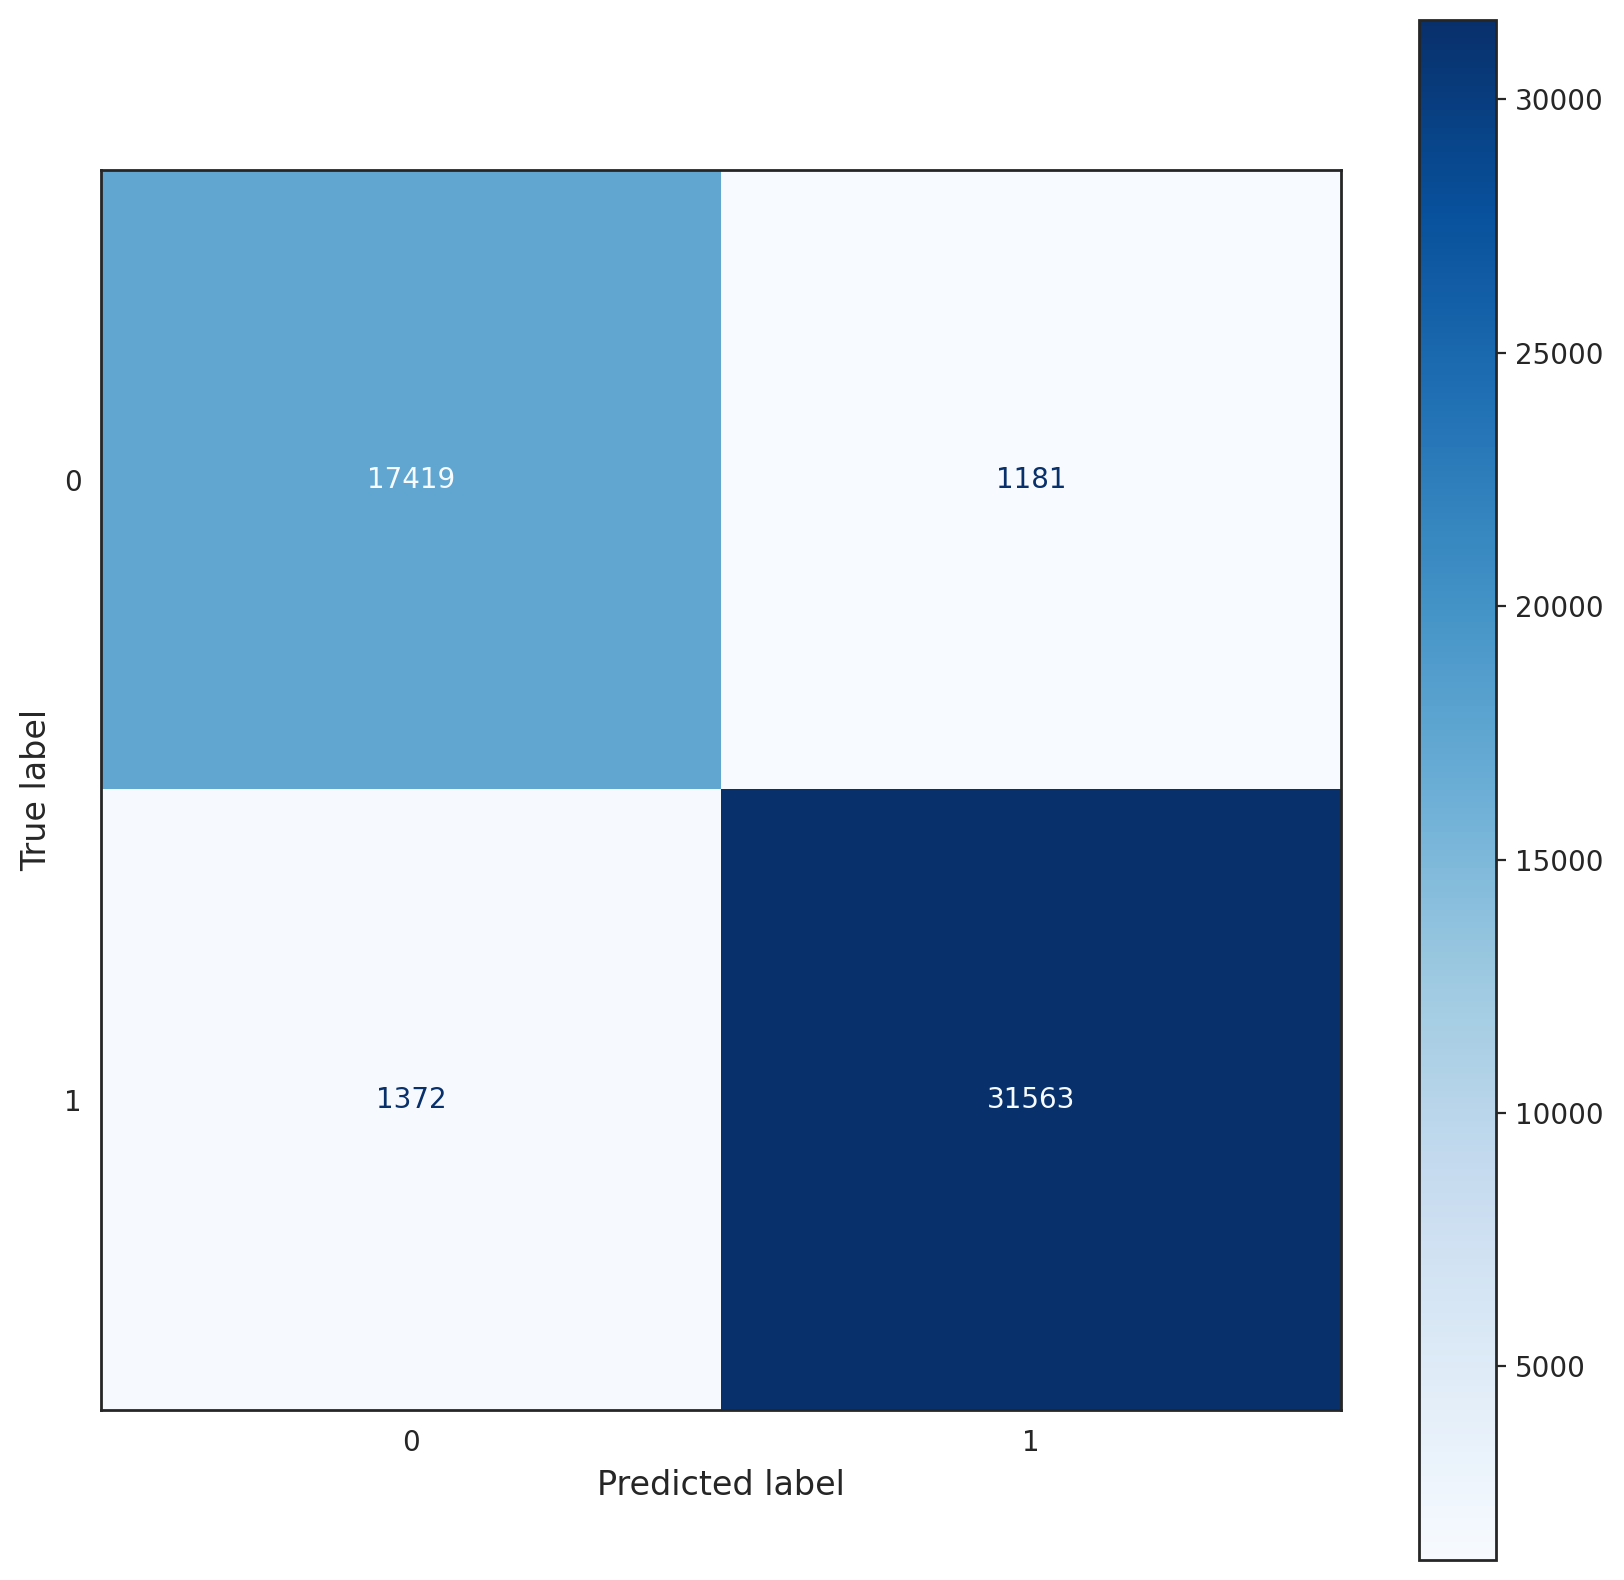

In [441]:
# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [259]:
#plt.rcParams['figure.figsize']=5,5
#sns.set_style("white")
#plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
#plt.show()

# Global explanation: Feature importance

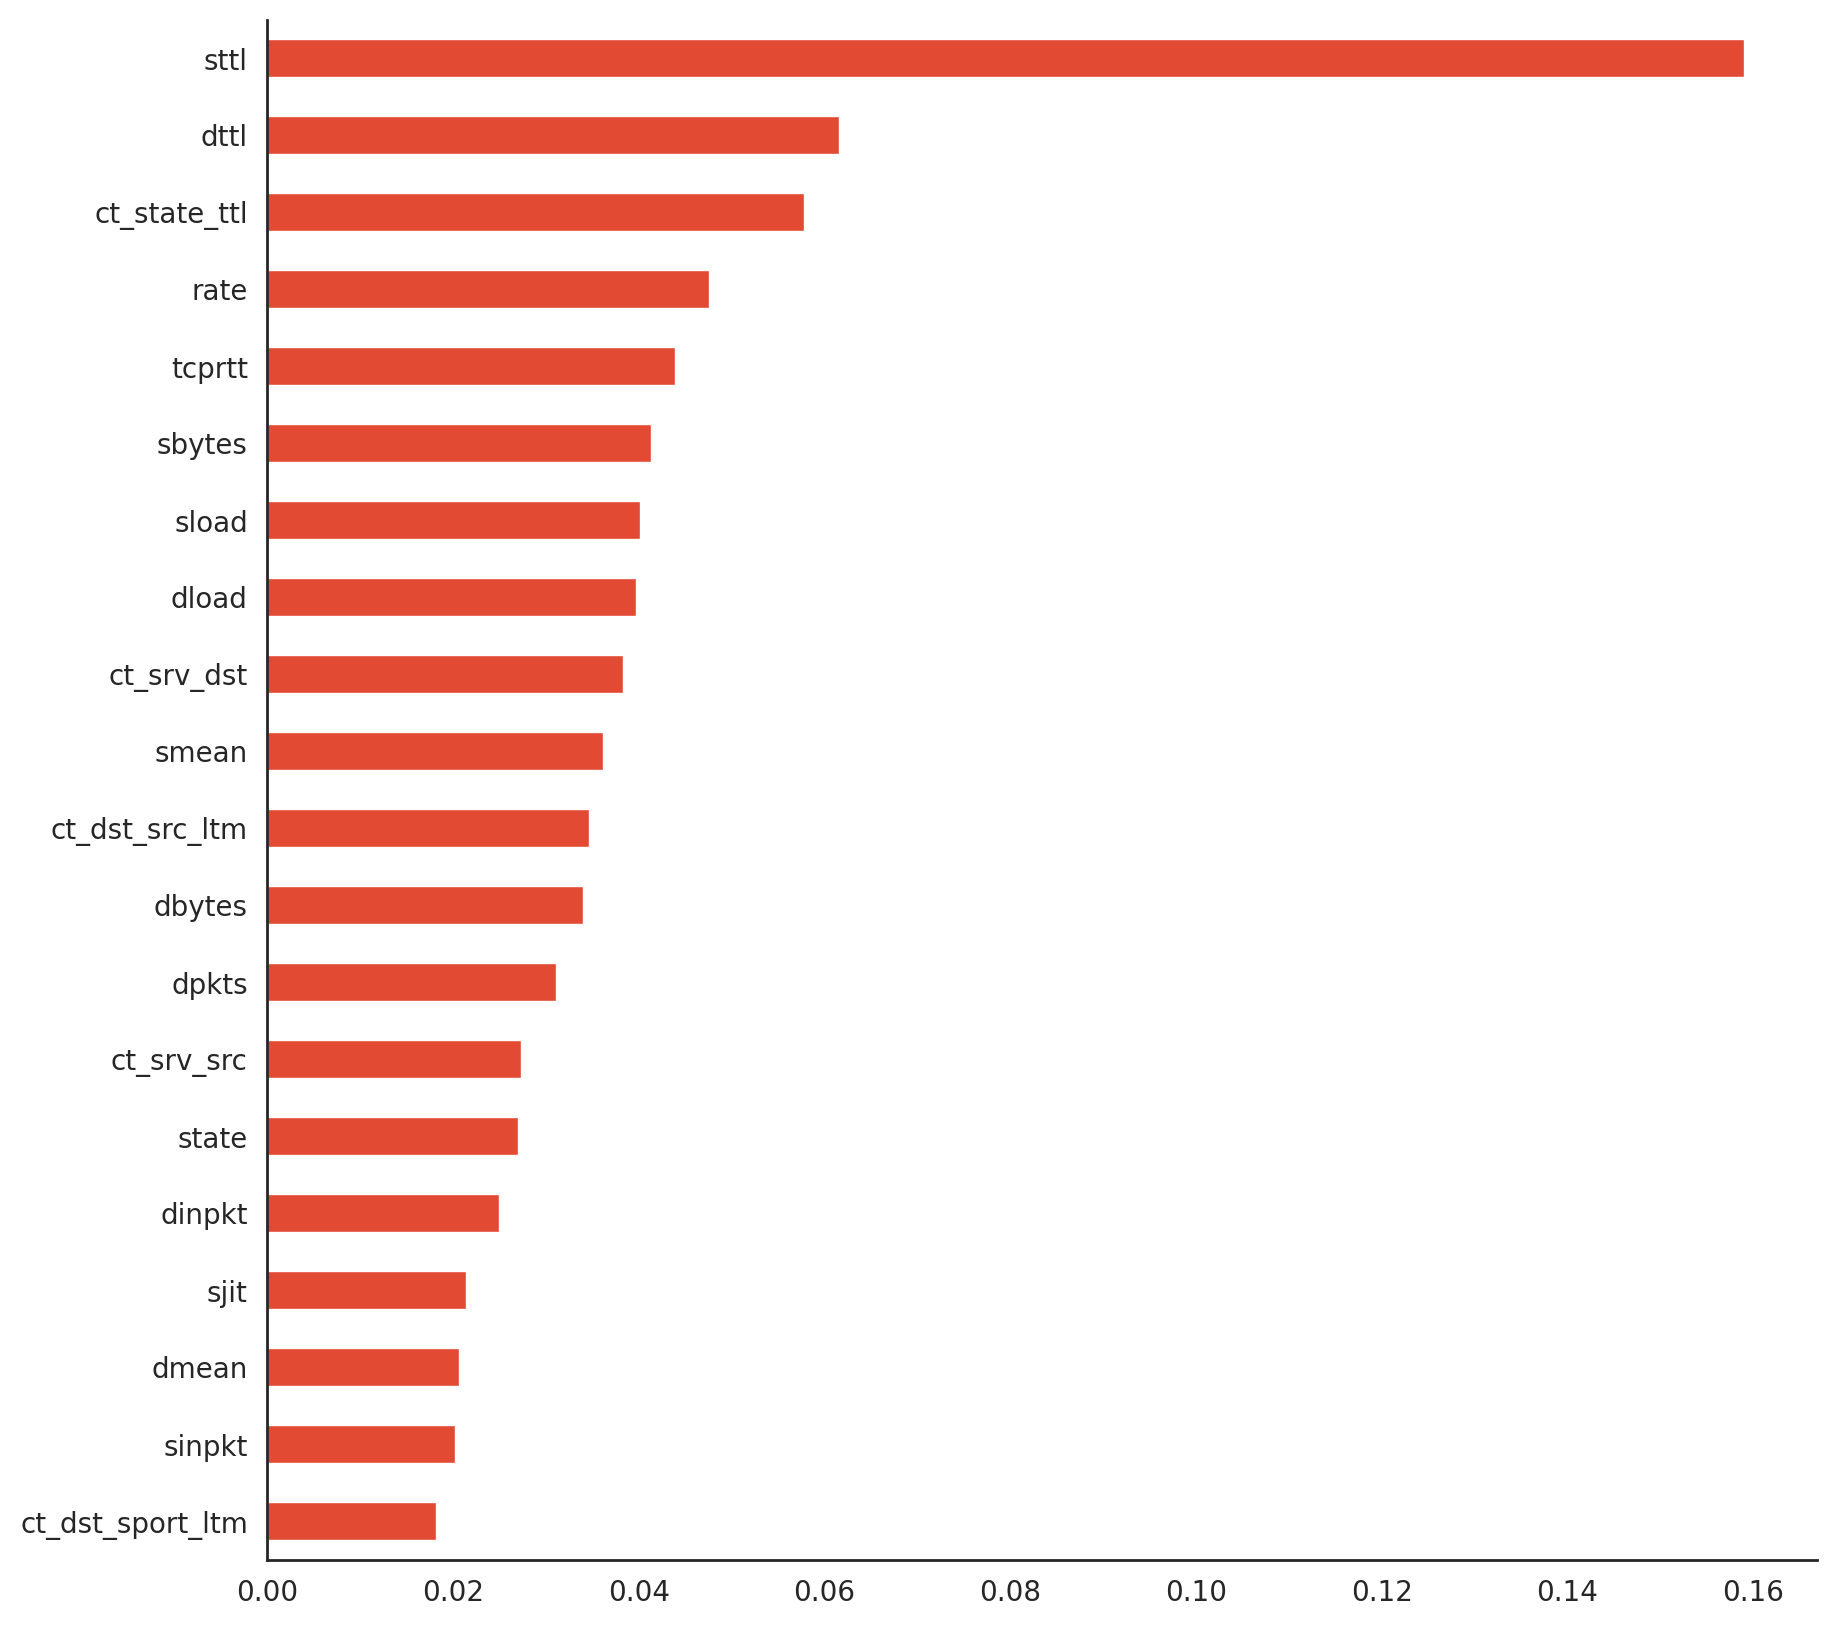

In [440]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

# Global explanation: Permutation importance

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

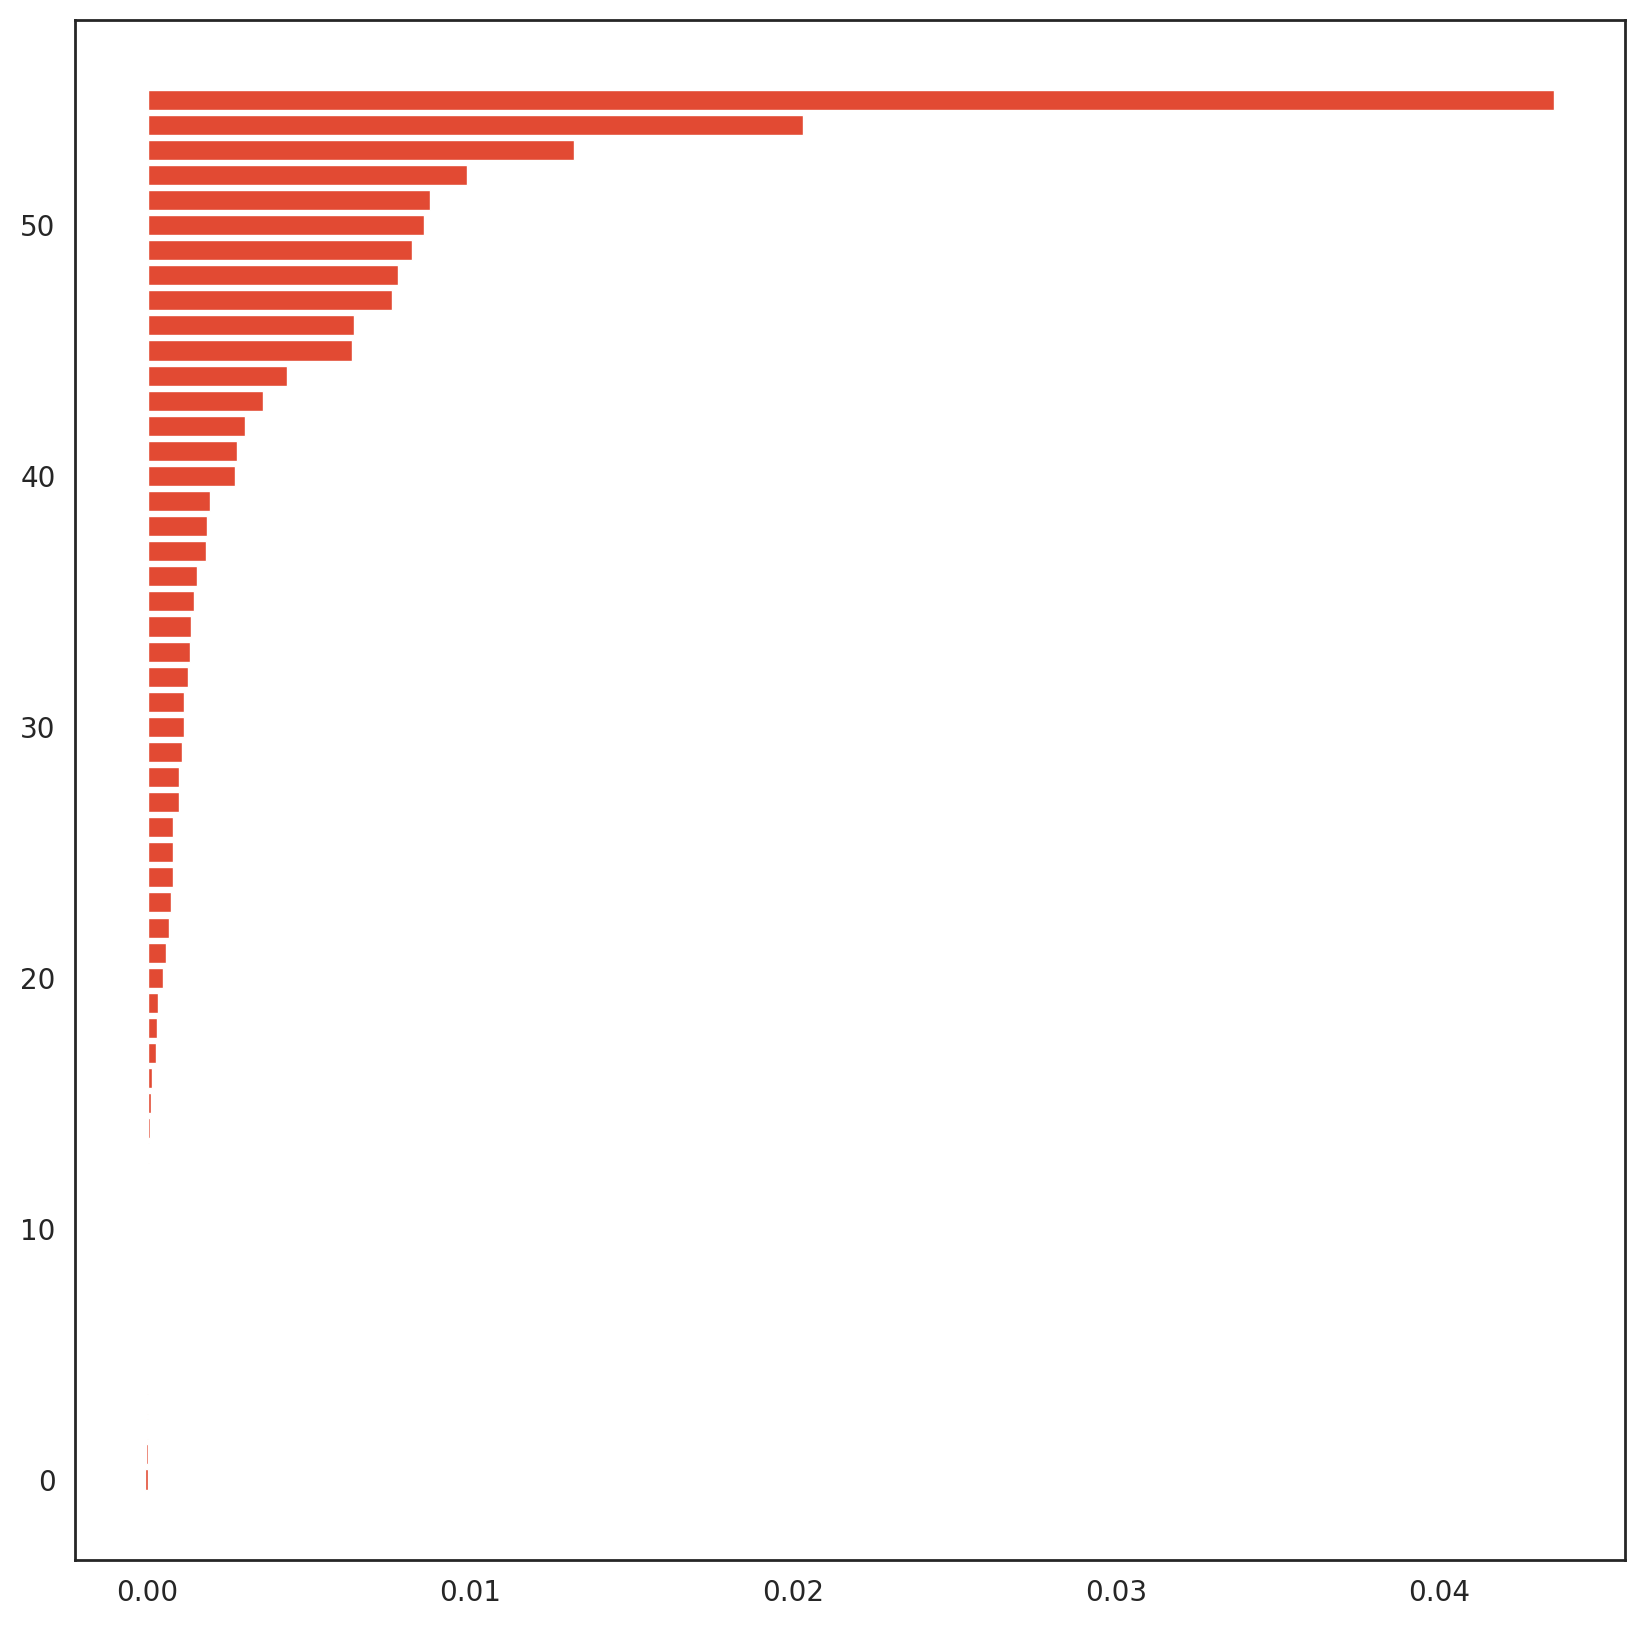

In [442]:
!pip install matplotlib seaborn scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
# Convert X_train to a Pandas DataFrame if it's not already one
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.title("Permutation Feature Importance")
plt.show()

In [457]:
pip uninstall scikit-learn shap -y

Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1
Found existing installation: shap 0.46.0
Uninstalling shap-0.46.0:
  Successfully uninstalled shap-0.46.0


In [458]:
pip install scikit-learn==1.0.2 shap==0.39.0

  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Created wheel for shap: filename=shap-0.39.0-cp310-cp310-linux_x86_64.whl size=497722 sha256=a3fd966c00a0c075ac6b11987359a31ba453c6bb6bf9f0d200933d5ac342c5a5
  Stored in directory: /root/.cache/pip/wheels/d4/ef/8d/78a07e01b86b1a0363626186f072e01683c10335e2eb89e337
Successfully built shap
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.11 requires scikit-learn>=1.3

In [459]:
# Local explanation: SHAP values
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

ImportError: cannot import name 'lobpcg' from 'sklearn.utils.fixes' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/fixes.py)

In [ ]:
# Summary plot
shap.summary_plot(shap_values, X_test)

In [ ]:
# Force plot for a specific prediction
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

<a id='4_6'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Gradient Boosting Classifier</b>

In [460]:
!pip install shap

In [461]:
from xgboost import XGBClassifier

In [462]:
%%time
start = time.time()
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 15.3 s, sys: 30.4 ms, total: 15.3 s
Wall time: 19.2 s


In [463]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['XGBClassifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 94.71%
Recall: 94.71%
Precision: 94.75%
F1-Score: 94.72%
time to train: 18.63 s
time to predict: 0.61 s
total: 19.24 s


In [ ]:
#plt.rcParams['figure.figsize']=5,5
#sns.set_style("white")
#plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
#plt.show()

Duplicate feature names found: ['-']
Consider renaming features or removing duplicates to ensure unique feature names.


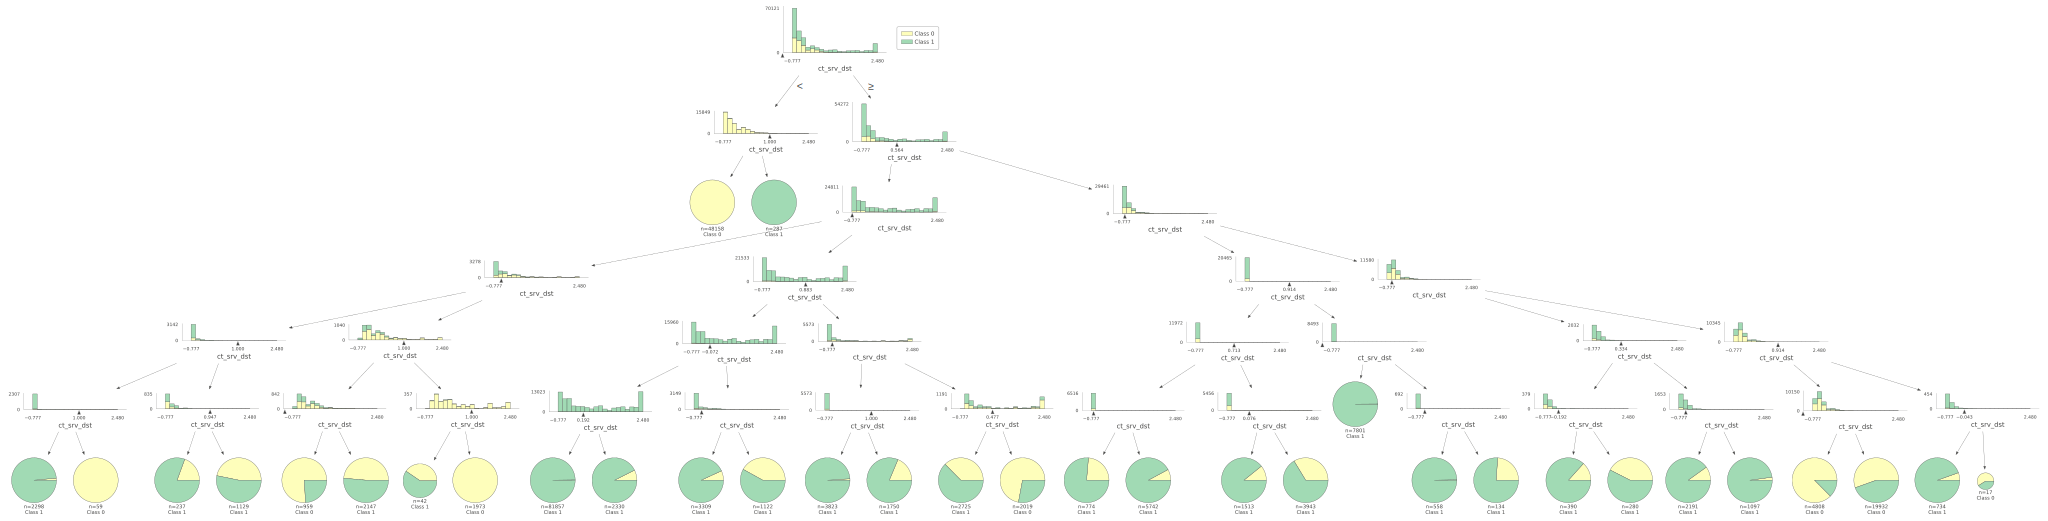

In [466]:
# Check for duplicate feature names
from collections import Counter # import Counter from collections module

duplicates = [name for name, count in Counter(feature_names).items() if count > 1]

# If duplicates exist, print them and suggest a fix
if duplicates:
    print(f"Duplicate feature names found: {duplicates}")
    print("Consider renaming features or removing duplicates to ensure unique feature names.")

# Example of renaming duplicate features (replace this with your actual renaming logic)
feature_names = [f"{name}_{i}" if name in duplicates else name for i, name in enumerate(feature_names)]

# Now call dtreeviz.model with the updated feature_names
viz_model = dtreeviz.model(model,tree_index=1,
                           X_train=X_train, y_train=y_train,
                           feature_names=feature_names)
viz_model.view()

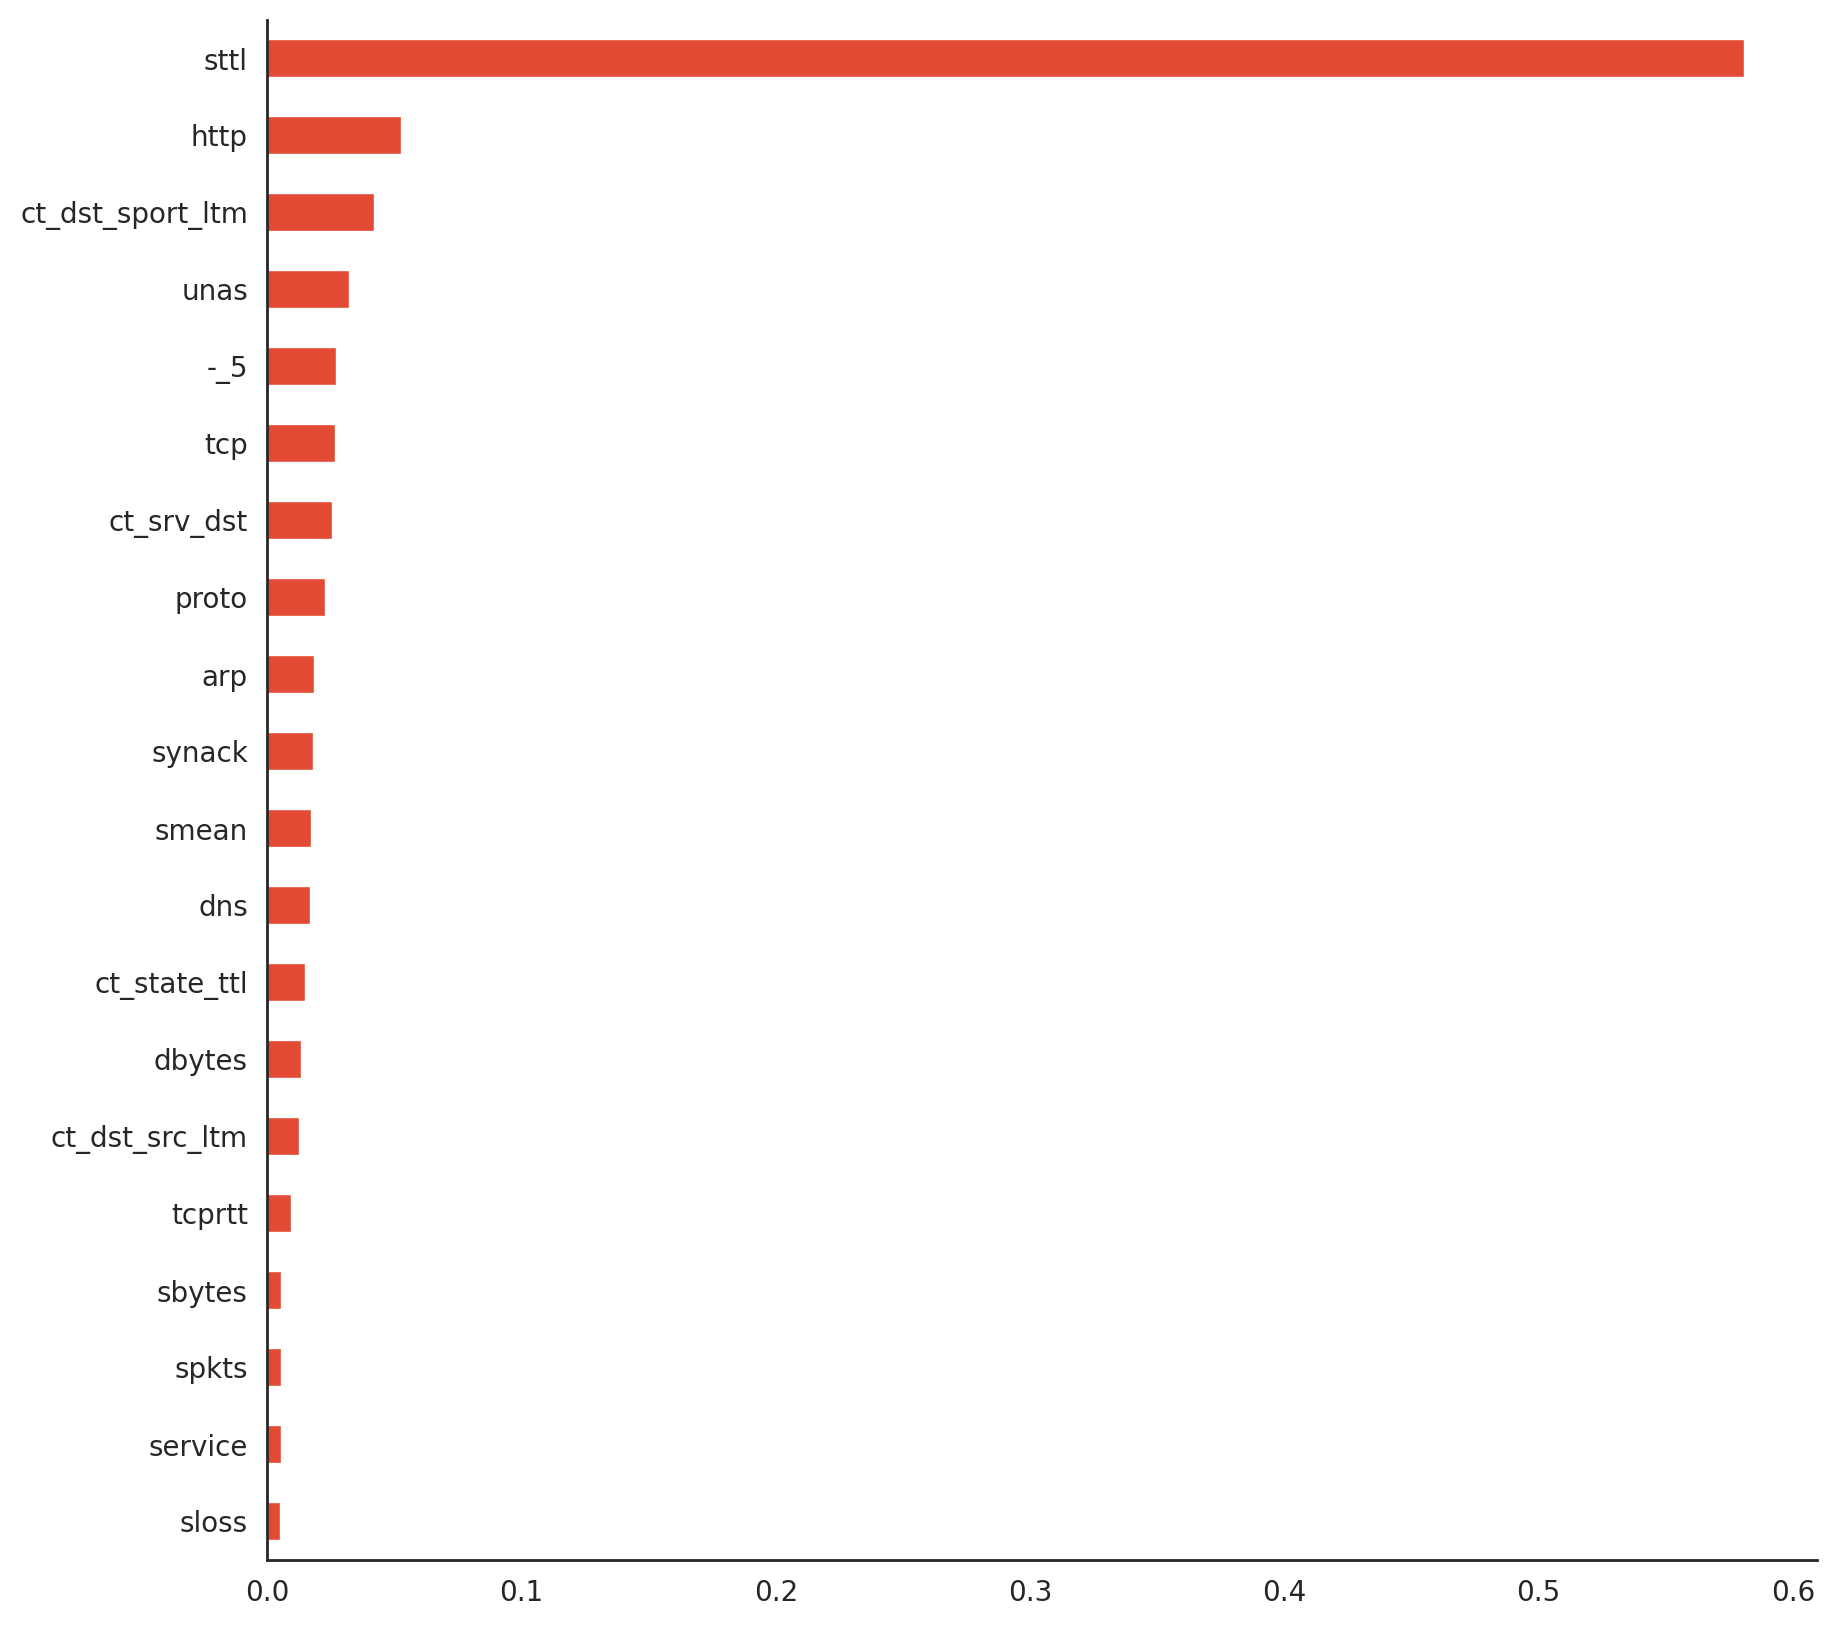

In [467]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [ ]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values_test = explainer.shap_values(X_test)

# Visualise Single Prediction

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[5,:], X_test.iloc[5,:])

In [ ]:
y_test[5]

In [ ]:
shap.force_plot(explainer.expected_value, shap_values_test[:1000,:], X_test.iloc[:1000,:])

# Bar chart of mean importance

In [ ]:
shap.summary_plot(shap_values_test, X_test, plot_type="bar")

SHAP Summary Plot: Rather than use a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. It is interesting to note that the relationship feature has more total model impact than the captial gain feature, but for those samples where capital gain matters it has more impact than age. In other words, capital gain effects a few predictions by a large amount, while age effects all predictions by a smaller amount.

Note that when the scatter points don't fit on a line they pile up to show density, and the color of each point represents the feature value of that individual.

In [ ]:
shap.summary_plot(shap_values_test, X_test)

SHAP dependence plots show the effect of a single feature across the whole dataset. They plot a feature's value vs. the SHAP value of that feature across many samples. SHAP dependence plots are similar to partial dependence plots, but account for the interaction effects present in the features, and are only defined in regions of the input space supported by data. The vertical dispersion of SHAP values at a single feature value is driven by interaction effects, and another feature is chosen for coloring to highlight possible interactions.

In [ ]:
for name in X_test.columns:
    shap.dependence_plot(name, shap_values_test, X_test, display_features=X_test)

Compute SHAP Interaction Values

See the Tree SHAP paper for more details, but briefly, SHAP interaction values are a generalization of SHAP values to higher order interactions. Fast exact computation of pairwise interactions are implemented in the latest version of XGBoost with the pred_interactions flag. With this flag XGBoost returns a matrix for every prediction, where the main effects are on the diagonal and the interaction effects are off-diagonal. The main effects are similar to the SHAP values you would get for a linear model, and the interaction effects captures all the higher-order interactions are divide them up among the pairwise interaction terms. Note that the sum of the entire interaction matrix is the difference between the model's current output and expected output, and so the interaction effects on the off-diagonal are split in half (since there are two of each). When plotting interaction effects the SHAP package automatically multiplies the off-diagonal values by two to get the full interaction effect.

In [ ]:
# takes a couple minutes since SHAP interaction values take a factor of 2 * # features
# more time than SHAP values to compute, since this is just an example we only explain
# the first 2,000 people in order to run quicker
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_test.iloc[:2000,:])

SHAP Interaction Value Summary Plot

A summary plot of a SHAP interaction value matrix plots a matrix of summary plots with the main effects on the diagonal and the interaction effects off the diagonal.

In [ ]:
shap.summary_plot(shap_interaction_values, X_test.iloc[:2000,:])

## USING LIME PACKAGE

In [ ]:
!pip install lime

In [ ]:
features = feature_names
explainer = lime.lime_tabular.LimeTabularExplainer(X_train ,feature_names = feature_names, class_names = ['Normal', 'Attack'], kernel_width=3)

These are just a mix of the continuous and categorical examples we showed before. For categorical features, the feature contribution is always the same as the linear model weight.

In [ ]:
np.random.seed(1)
i = 1653
exp = explainer.explain_instance(X_test[i], predict_fn, num_features=5)
exp.show_in_notebook(show_all=False)

In [ ]:
i = 10
exp = explainer.explain_instance(X_test[i], predict_fn, num_features=5)
exp.show_in_notebook(show_all=False)

<a id='4_8'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Neural Network MLP</b>

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (20,20,),
                      activation='relu',
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['MLP'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

In [ ]:
#plt.rcParams['figure.figsize']=5,5
#sns.set_style("white")
#plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
#plt.show()

# Explanations

In [ ]:
predict_fn = lambda x: MLP.predict_proba(x).astype(float)

In [ ]:
features = feature_names
explainer = lime.lime_tabular.LimeTabularExplainer(X_train ,feature_names = feature_names, class_names = ['Normal', 'Attack'], kernel_width=3)

In [ ]:
np.random.seed(1)
i = 1653
exp = explainer.explain_instance(X_test_transform[i], predict_fn, num_features=10)
exp.show_in_notebook(show_all=False)
print('True class: ')
if (y2_test_transform[i] == 0):
    print('Normal')
else:
    print('Attack')

In [274]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

<a id='4_8'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Neural Network MLP (Keras)</b>

In [265]:
#Import libraries that will allow you to use keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from keras import metrics
!pip install keras-metrics #It doesn't come with Google Colab
import keras_metrics as km #when compiling
import keras
import numpy as np
from numpy import array

In [267]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [268]:
X_train.shape

(206138, 56)

In [ ]:
#Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=56, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

#institate the model
model = build_model()

#fit the model
start = time.time()
model.fit(X_train, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

In [ ]:
#Evaluate the neural network
loss, accuracy, f1s, precision, recall = model.evaluate(X_test, y_test)
end_predict = time.time()
model_performance.loc['MLP (Keras)'] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]

In [272]:
# Assuming you have a DataFrame 'model_performance' to store the results
model_performance = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1-Score', 'Train Time', 'Predict Time', 'Total Time'])
model_performance.loc['MLP (Keras)'] = [accuracy, recall, precision, f1s, end_train-start, end_predict-end_train, end_predict-start]

# Print the results
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

Accuracy: 93.48%
Recall: 100.00%
Precision: 63.91%
F1-Score: 77.64%
time to train: 150.95 s
time to predict: 5.41 s
total: 156.36 s


<a id='4_8'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Convolutioanl Neural Network NLP (Keras)</b>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


In [ ]:
# Custom metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
X_test.shape

In [ ]:
# Define the CNN model
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy', f1_m, precision_m, recall_m])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


start = time.time()
# Fit the model
cnn_model = model.fit(X_train_scaled, y_train, epochs=3, batch_size=32, verbose=2) #This line returns a History object
end_train = time.time()

# Evaluate the model
loss, accuracy, f1s, precision, recall = model.evaluate(X_test_scaled, y_test, verbose=0) # Call evaluate on the model object
end_predict = time.time()

In [ ]:
# Predict using the CNN model
y_pred_cnn = (model.predict(X_test_scaled) > 0.5).astype("int32")

In [ ]:
# Assuming you have a DataFrame 'model_performance' to store the results
model_performance = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1-Score', 'Train Time', 'Predict Time', 'Total Time'])
model_performance.loc['model'] = [accuracy, recall, precision, f1s, end_train-start, end_predict-end_train, end_predict-start]

# Print the results
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

<a id='5'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Evaluate</b>

The models are compared in this chapter to determine which give the best performance. It seems that the winner is the Random Forest with a good performance on speed and prediction.

The MLP takes much longer to train in Keras than through sci-kit learn. I don't think that the verbosity of the output could have such a big impact. It is unclear why Keras is underperforming.

In [ ]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })